In [1]:
import os
import cv2
import shutil
import numpy as np
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
from keras_vggface import utils
from keras.preprocessing import image
from matplotlib import pyplot as plt

# face detector
from mtcnn.mtcnn import MTCNN
from shutil import copyfile

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s: %(message)s', level=logging.INFO)

# get an instance of MTCNN
detector = MTCNN()

In [8]:
# define src and des path

path_src_goodmask = [
    './datasets_ref/rmfd@x-zhangyang/AFDB_masked_face_dataset',
    './datasets_ref/face-mask-detection@ashishjangra27/Test/WithMask',
    './datasets_ref/face-mask-detection@ashishjangra27/Train/WithMask',
    './datasets_ref/face-mask-detection@ashishjangra27/Validation/WithMask',
    './datasets_ref/face-mask-detection@spandanpatnaik09/with_mask',
    './datasets_ref/face-mask-detection@vijaykumar1799/with_mask',
]

path_src_incorrectmask = [
    './datasets_ref/face-mask-detection@spandanpatnaik09/incorrect_mask',
    './datasets_ref/face-mask-detection@vijaykumar1799/mask_weared_incorrect',
]

path_src_notmask = [
    './datasets_ref/rmfd@x-zhangyang/AFDB_face_dataset', # NOTE!!!  >90k image face
    './datasets_ref/face-mask-detection@ashishjangra27/Test/WithoutMask',
    './datasets_ref/face-mask-detection@ashishjangra27/Train/WithoutMask',
    './datasets_ref/face-mask-detection@ashishjangra27/Validation/WithoutMask',
    './datasets_ref/face-mask-detection@spandanpatnaik09/with_mask',
    './datasets_ref/face-mask-detection@vijaykumar1799/with_mask'
]


path_des_correctmask = './datasets/original/correct_mask/'
path_des_incorrectmask = './datasets/original/incorrect_mask/'
path_des_notmask = './datasets/original/not_mask/'

In [4]:
# define function get all file in subfolder to single folder
# @srcPath: array with src path folder constain sample image.
# @desPath: des path folder constain sample image.
# @pre: naming prefix 
def copy_all_file(srcPath, desPath, pre='image'):
    num = 1
    max_pad = 6
    for path_root in srcPath:
        for path, subdirs, files in os.walk(path_root):
            for name in files:
                ori_name = name
                new_name = '{}_{}.{}'.format(pre, (str(num)).zfill(max_pad), name[name.index('.')+1:])
                num += 1
                print('File copy: {} => {}'.format(ori_name, new_name))
                src = os.path.join(path, name)
                des = os.path.join(desPath, new_name)
                # Copy file
                copyfile(src, des)

In [5]:
copy_all_file(path_src_goodmask, path_des_goodmask, pre='correct_mask')

File copy: 0_0_0.jpg => correct_mask_000001.jpg
File copy: 0_0_1.jpg => correct_mask_000002.jpg
File copy: 0_0_5.jpg => correct_mask_000003.jpg
File copy: 0_0_+·+ó 2020-02-24 225329.png => correct_mask_000004.png
File copy: 0_0_+·+ó 2020-02-24 225352.png => correct_mask_000005.png
File copy: 0_0_+·+ó 2020-02-24 225408.png => correct_mask_000006.png
File copy: 0_0_+·+ó 2020-02-24 225427.png => correct_mask_000007.png
File copy: 0_0_0.jpg => correct_mask_000008.jpg
File copy: 0_0_3.jpg => correct_mask_000009.jpg
File copy: 0_0_4.jpg => correct_mask_000010.jpg
File copy: 0_0_9.jpg => correct_mask_000011.jpg
File copy: 0_0_0.jpg => correct_mask_000012.jpg
File copy: 0_0_0.jpg => correct_mask_000013.jpg
File copy: 0_0_5.jpg => correct_mask_000014.jpg
File copy: 0_1_2.jpg => correct_mask_000015.jpg
File copy: 0_0_27.jpg => correct_mask_000016.jpg
File copy: 0_0_16.jpg => correct_mask_000017.jpg
File copy: 1_0_1.jpg => correct_mask_000018.jpg
File copy: 1_0_3.jpg => correct_mask_000019.jpg
Fi

File copy: 0_0_0.jpg => correct_mask_000468.jpg
File copy: 0_1_1.jpg => correct_mask_000469.jpg
File copy: 0_0_0.jpg => correct_mask_000470.jpg
File copy: 0_0_5.jpg => correct_mask_000471.jpg
File copy: 1_0_1.jpg => correct_mask_000472.jpg
File copy: 0_0_46fe0b54jw1eysjnlcazwj20dc0hsac0.jpg => correct_mask_000473.jpg
File copy: 0_0_46fe0b54jw1eysjnlrwdqj20dc0hsmz3.jpg => correct_mask_000474.jpg
File copy: 0_0_46fe0b54jw1eysjnm85f3j20dc0hs40a.jpg => correct_mask_000475.jpg
File copy: 0_0_2.jpg => correct_mask_000476.jpg
File copy: 1_0_15.jpg => correct_mask_000477.jpg
File copy: 0_0_10.jpg => correct_mask_000478.jpg
File copy: 0_0_4.jpg => correct_mask_000479.jpg
File copy: 1_0_14.jpg => correct_mask_000480.jpg
File copy: 0_0_0.jpg => correct_mask_000481.jpg
File copy: 0_0_19.jpg => correct_mask_000482.jpg
File copy: 0_0_27.jpg => correct_mask_000483.jpg
File copy: 0_0_39.jpg => correct_mask_000484.jpg
File copy: 0_0_49.jpg => correct_mask_000485.jpg
File copy: 0_0_6.jpg => correct_mask

File copy: 1_0_0.jpg => correct_mask_000994.jpg
File copy: 0_0_633fd32bly1gbckyhr0nyj20hs0hsgo9.jpg => correct_mask_000995.jpg
File copy: 0_0_25.jpg => correct_mask_000996.jpg
File copy: 1_0_16.jpg => correct_mask_000997.jpg
File copy: 1_0_18.jpg => correct_mask_000998.jpg
File copy: 1_0_3.jpg => correct_mask_000999.jpg
File copy: 0_0_15.jpg => correct_mask_001000.jpg
File copy: 1_0_0.jpg => correct_mask_001001.jpg
File copy: 0_0_1.jpg => correct_mask_001002.jpg
File copy: 0_0_2.jpg => correct_mask_001003.jpg
File copy: 0_0_5.jpg => correct_mask_001004.jpg
File copy: 0_0_0.jpg => correct_mask_001005.jpg
File copy: 0_0_4.jpg => correct_mask_001006.jpg
File copy: 0_0_6.jpg => correct_mask_001007.jpg
File copy: 0_0_7.jpg => correct_mask_001008.jpg
File copy: 1_0_1.jpg => correct_mask_001009.jpg
File copy: 0_0_0.jpg => correct_mask_001010.jpg
File copy: 1_0_1.jpg => correct_mask_001011.jpg
File copy: 0_0_20.jpg => correct_mask_001012.jpg
File copy: 0_0_0.jpg => correct_mask_001013.jpg
File

File copy: 0_0_19.jpg => correct_mask_001690.jpg
File copy: 0_0_2.jpg => correct_mask_001691.jpg
File copy: 0_0_20.jpg => correct_mask_001692.jpg
File copy: 0_0_21.jpg => correct_mask_001693.jpg
File copy: 0_0_22.jpg => correct_mask_001694.jpg
File copy: 0_0_24.jpg => correct_mask_001695.jpg
File copy: 0_0_27.jpg => correct_mask_001696.jpg
File copy: 0_0_28.jpg => correct_mask_001697.jpg
File copy: 0_0_3.jpg => correct_mask_001698.jpg
File copy: 0_0_4.jpg => correct_mask_001699.jpg
File copy: 0_0_5.jpg => correct_mask_001700.jpg
File copy: 0_0_6.jpg => correct_mask_001701.jpg
File copy: 0_0_7.jpg => correct_mask_001702.jpg
File copy: 0_0_8.jpg => correct_mask_001703.jpg
File copy: 1_0_23.jpg => correct_mask_001704.jpg
File copy: 1_0_9.jpg => correct_mask_001705.jpg
File copy: 0_0_1.jpg => correct_mask_001706.jpg
File copy: 0_0_11.jpg => correct_mask_001707.jpg
File copy: 0_0_12.jpg => correct_mask_001708.jpg
File copy: 0_0_14.jpg => correct_mask_001709.jpg
File copy: 0_0_17.jpg => corr

File copy: Augmented_545_2091737.png => correct_mask_002515.png
File copy: Augmented_546_8939403.png => correct_mask_002516.png
File copy: Augmented_549_4150433.png => correct_mask_002517.png
File copy: Augmented_553_7964791.png => correct_mask_002518.png
File copy: Augmented_559_2684759.png => correct_mask_002519.png
File copy: Augmented_559_9982535.png => correct_mask_002520.png
File copy: Augmented_55_3312596.png => correct_mask_002521.png
File copy: Augmented_561_1833142.png => correct_mask_002522.png
File copy: Augmented_562_8830079.png => correct_mask_002523.png
File copy: Augmented_564_5435112.png => correct_mask_002524.png
File copy: Augmented_567_5594021.png => correct_mask_002525.png
File copy: Augmented_568_6994589.png => correct_mask_002526.png
File copy: Augmented_569_2915532.png => correct_mask_002527.png
File copy: Augmented_56_323581.png => correct_mask_002528.png
File copy: Augmented_570_4040588.png => correct_mask_002529.png
File copy: Augmented_572_9213014.png => cor

File copy: 925.png => correct_mask_003399.png
File copy: 927.png => correct_mask_003400.png
File copy: 928.png => correct_mask_003401.png
File copy: 929.png => correct_mask_003402.png
File copy: 930.png => correct_mask_003403.png
File copy: 932.png => correct_mask_003404.png
File copy: 934.png => correct_mask_003405.png
File copy: 939.png => correct_mask_003406.png
File copy: 94.png => correct_mask_003407.png
File copy: 940.png => correct_mask_003408.png
File copy: 941.png => correct_mask_003409.png
File copy: 942.png => correct_mask_003410.png
File copy: 944.png => correct_mask_003411.png
File copy: 945.png => correct_mask_003412.png
File copy: 946.png => correct_mask_003413.png
File copy: 947.png => correct_mask_003414.png
File copy: 949.png => correct_mask_003415.png
File copy: 95.png => correct_mask_003416.png
File copy: 952.png => correct_mask_003417.png
File copy: 953.png => correct_mask_003418.png
File copy: 954.png => correct_mask_003419.png
File copy: 956.png => correct_mask_0

File copy: Augmented_251_6904.png => correct_mask_004244.png
File copy: Augmented_252_5596462.png => correct_mask_004245.png
File copy: Augmented_252_7847564.png => correct_mask_004246.png
File copy: Augmented_252_8777772.png => correct_mask_004247.png
File copy: Augmented_252_8823126.png => correct_mask_004248.png
File copy: Augmented_253_3524758.png => correct_mask_004249.png
File copy: Augmented_253_3858423.png => correct_mask_004250.png
File copy: Augmented_253_4177382.png => correct_mask_004251.png
File copy: Augmented_253_4971909.png => correct_mask_004252.png
File copy: Augmented_253_5940581.png => correct_mask_004253.png
File copy: Augmented_253_9645859.png => correct_mask_004254.png
File copy: Augmented_254_2343674.png => correct_mask_004255.png
File copy: Augmented_254_3168423.png => correct_mask_004256.png
File copy: Augmented_254_3670442.png => correct_mask_004257.png
File copy: Augmented_254_874572.png => correct_mask_004258.png
File copy: Augmented_255_1841227.png => corr

File copy: Augmented_415_5688430.png => correct_mask_005114.png
File copy: Augmented_415_7727516.png => correct_mask_005115.png
File copy: Augmented_415_9041629.png => correct_mask_005116.png
File copy: Augmented_416_2045295.png => correct_mask_005117.png
File copy: Augmented_416_2312209.png => correct_mask_005118.png
File copy: Augmented_416_6449933.png => correct_mask_005119.png
File copy: Augmented_416_7121428.png => correct_mask_005120.png
File copy: Augmented_416_8353756.png => correct_mask_005121.png
File copy: Augmented_417_1171135.png => correct_mask_005122.png
File copy: Augmented_417_1413749.png => correct_mask_005123.png
File copy: Augmented_417_4583926.png => correct_mask_005124.png
File copy: Augmented_417_6098967.png => correct_mask_005125.png
File copy: Augmented_417_642739.png => correct_mask_005126.png
File copy: Augmented_417_6990765.png => correct_mask_005127.png
File copy: Augmented_418_116381.png => correct_mask_005128.png
File copy: Augmented_418_7844233.png => co

File copy: Augmented_57_4594582.png => correct_mask_005965.png
File copy: Augmented_580_2073633.png => correct_mask_005966.png
File copy: Augmented_580_6969829.png => correct_mask_005967.png
File copy: Augmented_580_822027.png => correct_mask_005968.png
File copy: Augmented_580_9367622.png => correct_mask_005969.png
File copy: Augmented_581_1135092.png => correct_mask_005970.png
File copy: Augmented_581_2987143.png => correct_mask_005971.png
File copy: Augmented_581_3278068.png => correct_mask_005972.png
File copy: Augmented_581_3556109.png => correct_mask_005973.png
File copy: Augmented_581_3695751.png => correct_mask_005974.png
File copy: Augmented_581_7999803.png => correct_mask_005975.png
File copy: Augmented_582_2468891.png => correct_mask_005976.png
File copy: Augmented_582_4227160.png => correct_mask_005977.png
File copy: Augmented_582_5615279.png => correct_mask_005978.png
File copy: Augmented_582_7300844.png => correct_mask_005979.png
File copy: Augmented_583_1465941.png => co

File copy: Augmented_75_6428975.png => correct_mask_006930.png
File copy: Augmented_75_7452550.png => correct_mask_006931.png
File copy: Augmented_75_8784857.png => correct_mask_006932.png
File copy: Augmented_760_1128467.png => correct_mask_006933.png
File copy: Augmented_760_1904271.png => correct_mask_006934.png
File copy: Augmented_760_2356343.png => correct_mask_006935.png
File copy: Augmented_760_8791506.png => correct_mask_006936.png
File copy: Augmented_760_9999709.png => correct_mask_006937.png
File copy: Augmented_761_2090271.png => correct_mask_006938.png
File copy: Augmented_761_4664312.png => correct_mask_006939.png
File copy: Augmented_761_675988.png => correct_mask_006940.png
File copy: Augmented_761_7100765.png => correct_mask_006941.png
File copy: Augmented_761_9009360.png => correct_mask_006942.png
File copy: Augmented_762_1505768.png => correct_mask_006943.png
File copy: Augmented_762_2502169.png => correct_mask_006944.png
File copy: Augmented_762_602599.png => corre

File copy: 794.png => correct_mask_007745.png
File copy: 800.png => correct_mask_007746.png
File copy: 804.png => correct_mask_007747.png
File copy: 810.png => correct_mask_007748.png
File copy: 83.png => correct_mask_007749.png
File copy: 838.png => correct_mask_007750.png
File copy: 958.png => correct_mask_007751.png
File copy: 964.png => correct_mask_007752.png
File copy: 974.png => correct_mask_007753.png
File copy: Augmented_100_9435902.png => correct_mask_007754.png
File copy: Augmented_101_8850689.png => correct_mask_007755.png
File copy: Augmented_102_8649172.png => correct_mask_007756.png
File copy: Augmented_104_1102091.png => correct_mask_007757.png
File copy: Augmented_106_6675239.png => correct_mask_007758.png
File copy: Augmented_107_6784686.png => correct_mask_007759.png
File copy: Augmented_109_7984988.png => correct_mask_007760.png
File copy: Augmented_110_8567370.png => correct_mask_007761.png
File copy: Augmented_114_3364673.png => correct_mask_007762.png
File copy: 

In [6]:
copy_all_file(path_src_notmask, path_des_notmask, pre='not_mask')

File copy: 0_0_aidai_0014.jpg => not_mask_000001.jpg
File copy: 0_0_aidai_0029.jpg => not_mask_000002.jpg
File copy: 0_0_aidai_0043.jpg => not_mask_000003.jpg
File copy: 0_0_aidai_0074.jpg => not_mask_000004.jpg
File copy: 0_0_aidai_0080.jpg => not_mask_000005.jpg
File copy: 0_0_aidai_0084.jpg => not_mask_000006.jpg
File copy: 0_0_aidai_0136.jpg => not_mask_000007.jpg
File copy: 0_0_aidai_0168.jpg => not_mask_000008.jpg
File copy: 1_0_aidai_0001.jpg => not_mask_000009.jpg
File copy: 1_0_aidai_0002.jpg => not_mask_000010.jpg
File copy: 1_0_aidai_0003.jpg => not_mask_000011.jpg
File copy: 1_0_aidai_0004.jpg => not_mask_000012.jpg
File copy: 1_0_aidai_0005.jpg => not_mask_000013.jpg
File copy: 1_0_aidai_0006.jpg => not_mask_000014.jpg
File copy: 1_0_aidai_0007.jpg => not_mask_000015.jpg
File copy: 1_0_aidai_0008.jpg => not_mask_000016.jpg
File copy: 1_0_aidai_0009.jpg => not_mask_000017.jpg
File copy: 1_0_aidai_0010.jpg => not_mask_000018.jpg
File copy: 1_0_aidai_0011.jpg => not_mask_0000

File copy: 0_0_baijingting_0001.jpg => not_mask_000773.jpg
File copy: 0_0_baijingting_0004.jpg => not_mask_000774.jpg
File copy: 0_0_baijingting_0005.jpg => not_mask_000775.jpg
File copy: 0_0_baijingting_0010.jpg => not_mask_000776.jpg
File copy: 0_0_baijingting_0013.jpg => not_mask_000777.jpg
File copy: 0_0_baijingting_0016.jpg => not_mask_000778.jpg
File copy: 0_0_baijingting_0018.jpg => not_mask_000779.jpg
File copy: 0_0_baijingting_0026.jpg => not_mask_000780.jpg
File copy: 0_0_baijingting_0031.jpg => not_mask_000781.jpg
File copy: 0_0_baijingting_0033.jpg => not_mask_000782.jpg
File copy: 0_0_baijingting_0036.jpg => not_mask_000783.jpg
File copy: 0_0_baijingting_0037.jpg => not_mask_000784.jpg
File copy: 0_0_baijingting_0055.jpg => not_mask_000785.jpg
File copy: 0_0_baijingting_0059.jpg => not_mask_000786.jpg
File copy: 0_0_baijingting_0064.jpg => not_mask_000787.jpg
File copy: 0_0_baijingting_0068.jpg => not_mask_000788.jpg
File copy: 0_0_baijingting_0073.jpg => not_mask_000789.j

File copy: 1_0_benxi_0111.jpg => not_mask_001644.jpg
File copy: 1_0_benxi_0112.jpg => not_mask_001645.jpg
File copy: 1_0_benxi_0114.jpg => not_mask_001646.jpg
File copy: 1_0_benxi_0115.jpg => not_mask_001647.jpg
File copy: 1_0_benxi_0116.jpg => not_mask_001648.jpg
File copy: 1_0_benxi_0117.jpg => not_mask_001649.jpg
File copy: 1_0_benxi_0118.jpg => not_mask_001650.jpg
File copy: 1_0_benxi_0119.jpg => not_mask_001651.jpg
File copy: 1_0_benxi_0121.jpg => not_mask_001652.jpg
File copy: 1_0_benxi_0122.jpg => not_mask_001653.jpg
File copy: 1_0_benxi_0123.jpg => not_mask_001654.jpg
File copy: 1_0_benxi_0124.jpg => not_mask_001655.jpg
File copy: 1_0_benxi_0125.jpg => not_mask_001656.jpg
File copy: 1_0_benxi_0126.jpg => not_mask_001657.jpg
File copy: 1_0_benxi_0127.jpg => not_mask_001658.jpg
File copy: 1_0_benxi_0128.jpg => not_mask_001659.jpg
File copy: 1_0_benxi_0130.jpg => not_mask_001660.jpg
File copy: 1_0_benxi_0131.jpg => not_mask_001661.jpg
File copy: 1_0_benxi_0132.jpg => not_mask_0016

File copy: 1_0_caobingkun_0122.jpg => not_mask_002545.jpg
File copy: 1_0_caobingkun_0123.jpg => not_mask_002546.jpg
File copy: 1_0_caobingkun_0124.jpg => not_mask_002547.jpg
File copy: 1_0_caobingkun_0125.jpg => not_mask_002548.jpg
File copy: 1_0_caobingkun_0126.jpg => not_mask_002549.jpg
File copy: 1_0_caobingkun_0128.jpg => not_mask_002550.jpg
File copy: 1_0_caobingkun_0129.jpg => not_mask_002551.jpg
File copy: 1_0_caobingkun_0130.jpg => not_mask_002552.jpg
File copy: 1_0_caobingkun_0131.jpg => not_mask_002553.jpg
File copy: 1_0_caobingkun_0132.jpg => not_mask_002554.jpg
File copy: 1_0_caobingkun_0133.jpg => not_mask_002555.jpg
File copy: 1_0_caobingkun_0134.jpg => not_mask_002556.jpg
File copy: 1_0_caobingkun_0135.jpg => not_mask_002557.jpg
File copy: 1_0_caobingkun_0136.jpg => not_mask_002558.jpg
File copy: 1_0_caobingkun_0137.jpg => not_mask_002559.jpg
File copy: 1_0_caobingkun_0140.jpg => not_mask_002560.jpg
File copy: 1_0_caobingkun_0141.jpg => not_mask_002561.jpg
File copy: 1_0

File copy: 1_0_changshilei_0177.jpg => not_mask_003620.jpg
File copy: 1_0_changshilei_0179.jpg => not_mask_003621.jpg
File copy: 1_0_changshilei_0180.jpg => not_mask_003622.jpg
File copy: 1_0_changshilei_0181.jpg => not_mask_003623.jpg
File copy: 1_0_changshilei_0183.jpg => not_mask_003624.jpg
File copy: 1_0_changshilei_0184.jpg => not_mask_003625.jpg
File copy: 1_0_changshilei_0186.jpg => not_mask_003626.jpg
File copy: 1_0_changshilei_0187.jpg => not_mask_003627.jpg
File copy: 1_0_changshilei_0188.jpg => not_mask_003628.jpg
File copy: 1_0_changshilei_0189.jpg => not_mask_003629.jpg
File copy: 1_0_changshilei_0190.jpg => not_mask_003630.jpg
File copy: 1_0_changshilei_0191.jpg => not_mask_003631.jpg
File copy: 1_0_changshilei_0192.jpg => not_mask_003632.jpg
File copy: 1_0_changshilei_0193.jpg => not_mask_003633.jpg
File copy: 1_0_changshilei_0194.jpg => not_mask_003634.jpg
File copy: 1_0_changshilei_0195.jpg => not_mask_003635.jpg
File copy: 1_0_changshilei_0196.jpg => not_mask_003636.j

File copy: 0_0_chenglong_0077.jpg => not_mask_004540.jpg
File copy: 0_0_chenglong_0085.jpg => not_mask_004541.jpg
File copy: 0_0_chenglong_0100.jpg => not_mask_004542.jpg
File copy: 0_0_chenglong_0107.jpg => not_mask_004543.jpg
File copy: 0_0_chenglong_0116.jpg => not_mask_004544.jpg
File copy: 0_0_chenglong_0138.jpg => not_mask_004545.jpg
File copy: 0_0_chenglong_0143.jpg => not_mask_004546.jpg
File copy: 1_0_chenglong_0001.jpg => not_mask_004547.jpg
File copy: 1_0_chenglong_0002.jpg => not_mask_004548.jpg
File copy: 1_0_chenglong_0003.jpg => not_mask_004549.jpg
File copy: 1_0_chenglong_0005.jpg => not_mask_004550.jpg
File copy: 1_0_chenglong_0007.jpg => not_mask_004551.jpg
File copy: 1_0_chenglong_0008.jpg => not_mask_004552.jpg
File copy: 1_0_chenglong_0009.jpg => not_mask_004553.jpg
File copy: 1_0_chenglong_0010.jpg => not_mask_004554.jpg
File copy: 1_0_chenglong_0012.jpg => not_mask_004555.jpg
File copy: 1_0_chenglong_0013.jpg => not_mask_004556.jpg
File copy: 1_0_chenglong_0014.j

File copy: 1_0_chenhuixian_0002.jpg => not_mask_005538.jpg
File copy: 1_0_chenhuixian_0008.jpg => not_mask_005539.jpg
File copy: 1_0_chenhuixian_0009.jpg => not_mask_005540.jpg
File copy: 1_0_chenhuixian_0010.jpg => not_mask_005541.jpg
File copy: 1_0_chenhuixian_0011.jpg => not_mask_005542.jpg
File copy: 1_0_chenhuixian_0012.jpg => not_mask_005543.jpg
File copy: 1_0_chenhuixian_0013.jpg => not_mask_005544.jpg
File copy: 1_0_chenhuixian_0015.jpg => not_mask_005545.jpg
File copy: 1_0_chenhuixian_0016.jpg => not_mask_005546.jpg
File copy: 1_0_chenhuixian_0017.jpg => not_mask_005547.jpg
File copy: 1_0_chenhuixian_0019.jpg => not_mask_005548.jpg
File copy: 1_0_chenhuixian_0020.jpg => not_mask_005549.jpg
File copy: 1_0_chenhuixian_0022.jpg => not_mask_005550.jpg
File copy: 1_0_chenhuixian_0023.jpg => not_mask_005551.jpg
File copy: 1_0_chenhuixian_0024.jpg => not_mask_005552.jpg
File copy: 1_0_chenhuixian_0025.jpg => not_mask_005553.jpg
File copy: 1_0_chenhuixian_0027.jpg => not_mask_005554.j

File copy: 1_0_chenshu_0166.jpg => not_mask_006462.jpg
File copy: 1_0_chenshu_0167.jpg => not_mask_006463.jpg
File copy: 1_0_chenshu_0168.jpg => not_mask_006464.jpg
File copy: 1_0_chenshu_0169.jpg => not_mask_006465.jpg
File copy: 1_0_chenshu_0170.jpg => not_mask_006466.jpg
File copy: 1_0_chenshu_0171.jpg => not_mask_006467.jpg
File copy: 1_0_chenshu_0172.jpg => not_mask_006468.jpg
File copy: 1_0_chenshu_0173.jpg => not_mask_006469.jpg
File copy: 1_0_chenshu_0174.jpg => not_mask_006470.jpg
File copy: 1_0_chenshu_0175.jpg => not_mask_006471.jpg
File copy: 1_0_chenshu_0176.jpg => not_mask_006472.jpg
File copy: 1_0_chenshu_0177.jpg => not_mask_006473.jpg
File copy: 1_0_chenshu_0178.jpg => not_mask_006474.jpg
File copy: 1_0_chenshu_0179.jpg => not_mask_006475.jpg
File copy: 1_0_chenshu_0180.jpg => not_mask_006476.jpg
File copy: 1_0_chenshu_0182.jpg => not_mask_006477.jpg
File copy: 1_0_chenshu_0183.jpg => not_mask_006478.jpg
File copy: 1_0_chenshu_0184.jpg => not_mask_006479.jpg
File copy:

File copy: 1_0_chenyao_0040.jpg => not_mask_007414.jpg
File copy: 1_0_chenyao_0041.jpg => not_mask_007415.jpg
File copy: 1_0_chenyao_0042.jpg => not_mask_007416.jpg
File copy: 1_0_chenyao_0045.jpg => not_mask_007417.jpg
File copy: 1_0_chenyao_0046.jpg => not_mask_007418.jpg
File copy: 1_0_chenyao_0047.jpg => not_mask_007419.jpg
File copy: 1_0_chenyao_0048.jpg => not_mask_007420.jpg
File copy: 1_0_chenyao_0049.jpg => not_mask_007421.jpg
File copy: 1_0_chenyao_0050.jpg => not_mask_007422.jpg
File copy: 1_0_chenyao_0052.jpg => not_mask_007423.jpg
File copy: 1_0_chenyao_0054.jpg => not_mask_007424.jpg
File copy: 1_0_chenyao_0055.jpg => not_mask_007425.jpg
File copy: 1_0_chenyao_0056.jpg => not_mask_007426.jpg
File copy: 1_0_chenyao_0057.jpg => not_mask_007427.jpg
File copy: 1_0_chenyao_0058.jpg => not_mask_007428.jpg
File copy: 1_0_chenyao_0059.jpg => not_mask_007429.jpg
File copy: 1_0_chenyao_0060.jpg => not_mask_007430.jpg
File copy: 1_0_chenyao_0061.jpg => not_mask_007431.jpg
File copy:

File copy: 1_0_dazhangwei_0013.jpg => not_mask_008197.jpg
File copy: 1_0_dazhangwei_0014.jpg => not_mask_008198.jpg
File copy: 1_0_dazhangwei_0015.jpg => not_mask_008199.jpg
File copy: 1_0_dazhangwei_0016.jpg => not_mask_008200.jpg
File copy: 1_0_dazhangwei_0017.jpg => not_mask_008201.jpg
File copy: 1_0_dazhangwei_0018.jpg => not_mask_008202.jpg
File copy: 1_0_dazhangwei_0019.jpg => not_mask_008203.jpg
File copy: 1_0_dazhangwei_0020.jpg => not_mask_008204.jpg
File copy: 1_0_dazhangwei_0021.jpg => not_mask_008205.jpg
File copy: 1_0_dazhangwei_0022.jpg => not_mask_008206.jpg
File copy: 1_0_dazhangwei_0024.jpg => not_mask_008207.jpg
File copy: 1_0_dazhangwei_0025.jpg => not_mask_008208.jpg
File copy: 1_0_dazhangwei_0027.jpg => not_mask_008209.jpg
File copy: 1_0_dazhangwei_0028.jpg => not_mask_008210.jpg
File copy: 1_0_dazhangwei_0029.jpg => not_mask_008211.jpg
File copy: 1_0_dazhangwei_0031.jpg => not_mask_008212.jpg
File copy: 1_0_dazhangwei_0032.jpg => not_mask_008213.jpg
File copy: 1_0

File copy: 1_0_ditianlin_0132.jpg => not_mask_009226.jpg
File copy: 1_0_ditianlin_0133.jpg => not_mask_009227.jpg
File copy: 1_0_ditianlin_0134.jpg => not_mask_009228.jpg
File copy: 1_0_ditianlin_0135.jpg => not_mask_009229.jpg
File copy: 1_0_ditianlin_0137.jpg => not_mask_009230.jpg
File copy: 1_0_ditianlin_0138.jpg => not_mask_009231.jpg
File copy: 1_0_ditianlin_0139.jpg => not_mask_009232.jpg
File copy: 1_0_ditianlin_0140.jpg => not_mask_009233.jpg
File copy: 1_0_ditianlin_0141.jpg => not_mask_009234.jpg
File copy: 1_0_ditianlin_0142.jpg => not_mask_009235.jpg
File copy: 1_0_ditianlin_0143.jpg => not_mask_009236.jpg
File copy: 1_0_ditianlin_0144.jpg => not_mask_009237.jpg
File copy: 1_0_ditianlin_0145.jpg => not_mask_009238.jpg
File copy: 1_0_ditianlin_0146.jpg => not_mask_009239.jpg
File copy: 1_0_ditianlin_0147.jpg => not_mask_009240.jpg
File copy: 1_0_ditianlin_0148.jpg => not_mask_009241.jpg
File copy: 1_0_ditianlin_0149.jpg => not_mask_009242.jpg
File copy: 1_0_ditianlin_0150.j

File copy: 0_0_dujiang_0156.jpg => not_mask_010204.jpg
File copy: 0_0_dujiang_0174.jpg => not_mask_010205.jpg
File copy: 0_0_dujiang_0183.jpg => not_mask_010206.jpg
File copy: 0_0_dujiang_0189.jpg => not_mask_010207.jpg
File copy: 0_0_dujiang_0191.jpg => not_mask_010208.jpg
File copy: 0_0_dujiang_0195.jpg => not_mask_010209.jpg
File copy: 0_0_dujiang_0200.jpg => not_mask_010210.jpg
File copy: 0_0_dujiang_0203.jpg => not_mask_010211.jpg
File copy: 1_0_dujiang_0001.jpg => not_mask_010212.jpg
File copy: 1_0_dujiang_0002.jpg => not_mask_010213.jpg
File copy: 1_0_dujiang_0003.jpg => not_mask_010214.jpg
File copy: 1_0_dujiang_0005.jpg => not_mask_010215.jpg
File copy: 1_0_dujiang_0006.jpg => not_mask_010216.jpg
File copy: 1_0_dujiang_0007.jpg => not_mask_010217.jpg
File copy: 1_0_dujiang_0009.jpg => not_mask_010218.jpg
File copy: 1_0_dujiang_0013.jpg => not_mask_010219.jpg
File copy: 1_0_dujiang_0014.jpg => not_mask_010220.jpg
File copy: 1_0_dujiang_0015.jpg => not_mask_010221.jpg
File copy:

File copy: 1_0_fanwei_0008.jpg => not_mask_011259.jpg
File copy: 1_0_fanwei_0009.jpg => not_mask_011260.jpg
File copy: 1_0_fanwei_0010.jpg => not_mask_011261.jpg
File copy: 1_0_fanwei_0011.jpg => not_mask_011262.jpg
File copy: 1_0_fanwei_0013.jpg => not_mask_011263.jpg
File copy: 1_0_fanwei_0015.jpg => not_mask_011264.jpg
File copy: 1_0_fanwei_0016.jpg => not_mask_011265.jpg
File copy: 1_0_fanwei_0019.jpg => not_mask_011266.jpg
File copy: 1_0_fanwei_0020.jpg => not_mask_011267.jpg
File copy: 1_0_fanwei_0021.jpg => not_mask_011268.jpg
File copy: 1_0_fanwei_0022.jpg => not_mask_011269.jpg
File copy: 1_0_fanwei_0023.jpg => not_mask_011270.jpg
File copy: 1_0_fanwei_0024.jpg => not_mask_011271.jpg
File copy: 1_0_fanwei_0027.jpg => not_mask_011272.jpg
File copy: 1_0_fanwei_0028.jpg => not_mask_011273.jpg
File copy: 1_0_fanwei_0030.jpg => not_mask_011274.jpg
File copy: 1_0_fanwei_0031.jpg => not_mask_011275.jpg
File copy: 1_0_fanwei_0033.jpg => not_mask_011276.jpg
File copy: 1_0_fanwei_0034.j

File copy: 1_0_ganwei_0128.jpg => not_mask_012121.jpg
File copy: 1_0_ganwei_0129.jpg => not_mask_012122.jpg
File copy: 1_0_ganwei_0130.jpg => not_mask_012123.jpg
File copy: 1_0_ganwei_0131.jpg => not_mask_012124.jpg
File copy: 1_0_ganwei_0132.jpg => not_mask_012125.jpg
File copy: 1_0_ganwei_0134.jpg => not_mask_012126.jpg
File copy: 1_0_ganwei_0136.jpg => not_mask_012127.jpg
File copy: 1_0_ganwei_0137.jpg => not_mask_012128.jpg
File copy: 1_0_ganwei_0139.jpg => not_mask_012129.jpg
File copy: 1_0_ganwei_0140.jpg => not_mask_012130.jpg
File copy: 1_0_ganwei_0141.jpg => not_mask_012131.jpg
File copy: 1_0_ganwei_0142.jpg => not_mask_012132.jpg
File copy: 1_0_ganwei_0143.jpg => not_mask_012133.jpg
File copy: 1_0_ganwei_0144.jpg => not_mask_012134.jpg
File copy: 1_0_ganwei_0145.jpg => not_mask_012135.jpg
File copy: 1_0_ganwei_0146.jpg => not_mask_012136.jpg
File copy: 1_0_ganwei_0147.jpg => not_mask_012137.jpg
File copy: 1_0_ganwei_0148.jpg => not_mask_012138.jpg
File copy: 1_0_ganwei_0149.j

File copy: 1_0_gongbeibi_0204.jpg => not_mask_013069.jpg
File copy: 1_0_gongbeibi_0205.jpg => not_mask_013070.jpg
File copy: 1_0_gongbeibi_0206.jpg => not_mask_013071.jpg
File copy: 1_0_gongbeibi_0207.jpg => not_mask_013072.jpg
File copy: 1_0_gongbeibi_0208.jpg => not_mask_013073.jpg
File copy: 1_0_gongbeibi_0209.jpg => not_mask_013074.jpg
File copy: 1_0_gongbeibi_0211.jpg => not_mask_013075.jpg
File copy: 1_0_gongbeibi_0212.jpg => not_mask_013076.jpg
File copy: 1_0_gongbeibi_0213.jpg => not_mask_013077.jpg
File copy: 1_0_gongbeibi_0214.jpg => not_mask_013078.jpg
File copy: 1_0_gongbeibi_0215.jpg => not_mask_013079.jpg
File copy: 1_0_gongbeibi_0217.jpg => not_mask_013080.jpg
File copy: 1_0_gongbeibi_0218.jpg => not_mask_013081.jpg
File copy: 1_0_gongbeibi_0219.jpg => not_mask_013082.jpg
File copy: 1_0_gongbeibi_0220.jpg => not_mask_013083.jpg
File copy: 1_0_gongbeibi_0221.jpg => not_mask_013084.jpg
File copy: 1_0_gongbeibi_0222.jpg => not_mask_013085.jpg
File copy: 1_0_gongbeibi_0223.j

File copy: 0_0_guofucheng_0126.jpg => not_mask_014165.jpg
File copy: 0_0_guofucheng_0128.jpg => not_mask_014166.jpg
File copy: 0_0_guofucheng_0137.jpg => not_mask_014167.jpg
File copy: 0_0_guofucheng_0145.jpg => not_mask_014168.jpg
File copy: 0_0_guofucheng_0148.jpg => not_mask_014169.jpg
File copy: 0_0_guofucheng_0150.jpg => not_mask_014170.jpg
File copy: 0_0_guofucheng_0151.jpg => not_mask_014171.jpg
File copy: 0_0_guofucheng_0152.jpg => not_mask_014172.jpg
File copy: 0_0_guofucheng_0153.jpg => not_mask_014173.jpg
File copy: 0_0_guofucheng_0171.jpg => not_mask_014174.jpg
File copy: 0_0_guofucheng_0173.jpg => not_mask_014175.jpg
File copy: 0_0_guofucheng_0181.jpg => not_mask_014176.jpg
File copy: 0_0_guofucheng_0182.jpg => not_mask_014177.jpg
File copy: 0_0_guofucheng_0183.jpg => not_mask_014178.jpg
File copy: 0_0_guofucheng_0186.jpg => not_mask_014179.jpg
File copy: 0_0_guofucheng_0188.jpg => not_mask_014180.jpg
File copy: 0_0_guofucheng_0191.jpg => not_mask_014181.jpg
File copy: 0_0

File copy: 1_0_guojunchen_0190.jpg => not_mask_015163.jpg
File copy: 1_0_guojunchen_0191.jpg => not_mask_015164.jpg
File copy: 1_0_guojunchen_0192.jpg => not_mask_015165.jpg
File copy: 1_0_guojunchen_0193.jpg => not_mask_015166.jpg
File copy: 0_0_guoxiaofeng_0054.jpg => not_mask_015167.jpg
File copy: 0_0_guoxiaofeng_0068.jpg => not_mask_015168.jpg
File copy: 0_0_guoxiaofeng_0082.jpg => not_mask_015169.jpg
File copy: 0_0_guoxiaofeng_0087.jpg => not_mask_015170.jpg
File copy: 0_0_guoxiaofeng_0217.jpg => not_mask_015171.jpg
File copy: 0_0_guoxiaofeng_0233.jpg => not_mask_015172.jpg
File copy: 1_0_guoxiaofeng_0001.jpg => not_mask_015173.jpg
File copy: 1_0_guoxiaofeng_0002.jpg => not_mask_015174.jpg
File copy: 1_0_guoxiaofeng_0003.jpg => not_mask_015175.jpg
File copy: 1_0_guoxiaofeng_0004.jpg => not_mask_015176.jpg
File copy: 1_0_guoxiaofeng_0005.jpg => not_mask_015177.jpg
File copy: 1_0_guoxiaofeng_0006.jpg => not_mask_015178.jpg
File copy: 1_0_guoxiaofeng_0007.jpg => not_mask_015179.jpg
F

File copy: 0_0_hanqingzi_0010.jpg => not_mask_016321.jpg
File copy: 0_0_hanqingzi_0014.jpg => not_mask_016322.jpg
File copy: 0_0_hanqingzi_0018.jpg => not_mask_016323.jpg
File copy: 0_0_hanqingzi_0027.jpg => not_mask_016324.jpg
File copy: 0_0_hanqingzi_0040.jpg => not_mask_016325.jpg
File copy: 0_0_hanqingzi_0048.jpg => not_mask_016326.jpg
File copy: 0_0_hanqingzi_0049.jpg => not_mask_016327.jpg
File copy: 0_0_hanqingzi_0058.jpg => not_mask_016328.jpg
File copy: 0_0_hanqingzi_0064.jpg => not_mask_016329.jpg
File copy: 0_0_hanqingzi_0067.jpg => not_mask_016330.jpg
File copy: 0_0_hanqingzi_0070.jpg => not_mask_016331.jpg
File copy: 0_0_hanqingzi_0075.jpg => not_mask_016332.jpg
File copy: 0_0_hanqingzi_0087.jpg => not_mask_016333.jpg
File copy: 0_0_hanqingzi_0091.jpg => not_mask_016334.jpg
File copy: 0_0_hanqingzi_0094.jpg => not_mask_016335.jpg
File copy: 0_0_hanqingzi_0096.jpg => not_mask_016336.jpg
File copy: 0_0_hanqingzi_0105.jpg => not_mask_016337.jpg
File copy: 0_0_hanqingzi_0109.j

File copy: 1_0_hejunxiang_0011.jpg => not_mask_017316.jpg
File copy: 1_0_hejunxiang_0012.jpg => not_mask_017317.jpg
File copy: 1_0_hejunxiang_0013.jpg => not_mask_017318.jpg
File copy: 1_0_hejunxiang_0014.jpg => not_mask_017319.jpg
File copy: 1_0_hejunxiang_0015.jpg => not_mask_017320.jpg
File copy: 1_0_hejunxiang_0017.jpg => not_mask_017321.jpg
File copy: 1_0_hejunxiang_0018.jpg => not_mask_017322.jpg
File copy: 1_0_hejunxiang_0019.jpg => not_mask_017323.jpg
File copy: 1_0_hejunxiang_0020.jpg => not_mask_017324.jpg
File copy: 1_0_hejunxiang_0022.jpg => not_mask_017325.jpg
File copy: 1_0_hejunxiang_0023.jpg => not_mask_017326.jpg
File copy: 1_0_hejunxiang_0024.jpg => not_mask_017327.jpg
File copy: 1_0_hejunxiang_0026.jpg => not_mask_017328.jpg
File copy: 1_0_hejunxiang_0027.jpg => not_mask_017329.jpg
File copy: 1_0_hejunxiang_0029.jpg => not_mask_017330.jpg
File copy: 1_0_hejunxiang_0030.jpg => not_mask_017331.jpg
File copy: 1_0_hejunxiang_0031.jpg => not_mask_017332.jpg
File copy: 1_0

File copy: 1_0_huanghaibo_0018.jpg => not_mask_018292.jpg
File copy: 1_0_huanghaibo_0019.jpg => not_mask_018293.jpg
File copy: 1_0_huanghaibo_0020.jpg => not_mask_018294.jpg
File copy: 1_0_huanghaibo_0021.jpg => not_mask_018295.jpg
File copy: 1_0_huanghaibo_0022.jpg => not_mask_018296.jpg
File copy: 1_0_huanghaibo_0023.jpg => not_mask_018297.jpg
File copy: 1_0_huanghaibo_0024.jpg => not_mask_018298.jpg
File copy: 1_0_huanghaibo_0025.jpg => not_mask_018299.jpg
File copy: 1_0_huanghaibo_0026.jpg => not_mask_018300.jpg
File copy: 1_0_huanghaibo_0027.jpg => not_mask_018301.jpg
File copy: 1_0_huanghaibo_0028.jpg => not_mask_018302.jpg
File copy: 1_0_huanghaibo_0029.jpg => not_mask_018303.jpg
File copy: 1_0_huanghaibo_0030.jpg => not_mask_018304.jpg
File copy: 1_0_huanghaibo_0031.jpg => not_mask_018305.jpg
File copy: 1_0_huanghaibo_0032.jpg => not_mask_018306.jpg
File copy: 1_0_huanghaibo_0033.jpg => not_mask_018307.jpg
File copy: 1_0_huanghaibo_0034.jpg => not_mask_018308.jpg
File copy: 1_0

File copy: 1_0_huangrihua_0041.jpg => not_mask_019355.jpg
File copy: 1_0_huangrihua_0042.jpg => not_mask_019356.jpg
File copy: 1_0_huangrihua_0044.jpg => not_mask_019357.jpg
File copy: 1_0_huangrihua_0045.jpg => not_mask_019358.jpg
File copy: 1_0_huangrihua_0047.jpg => not_mask_019359.jpg
File copy: 1_0_huangrihua_0048.jpg => not_mask_019360.jpg
File copy: 1_0_huangrihua_0050.jpg => not_mask_019361.jpg
File copy: 1_0_huangrihua_0052.jpg => not_mask_019362.jpg
File copy: 1_0_huangrihua_0053.jpg => not_mask_019363.jpg
File copy: 1_0_huangrihua_0054.jpg => not_mask_019364.jpg
File copy: 1_0_huangrihua_0055.jpg => not_mask_019365.jpg
File copy: 1_0_huangrihua_0056.jpg => not_mask_019366.jpg
File copy: 1_0_huangrihua_0057.jpg => not_mask_019367.jpg
File copy: 1_0_huangrihua_0058.jpg => not_mask_019368.jpg
File copy: 1_0_huangrihua_0059.jpg => not_mask_019369.jpg
File copy: 1_0_huangrihua_0060.jpg => not_mask_019370.jpg
File copy: 1_0_huangrihua_0061.jpg => not_mask_019371.jpg
File copy: 1_0

File copy: 1_0_huangzhiwei_0033.jpg => not_mask_020464.jpg
File copy: 1_0_huangzhiwei_0034.jpg => not_mask_020465.jpg
File copy: 1_0_huangzhiwei_0035.jpg => not_mask_020466.jpg
File copy: 1_0_huangzhiwei_0037.jpg => not_mask_020467.jpg
File copy: 1_0_huangzhiwei_0038.jpg => not_mask_020468.jpg
File copy: 1_0_huangzhiwei_0041.jpg => not_mask_020469.jpg
File copy: 1_0_huangzhiwei_0042.jpg => not_mask_020470.jpg
File copy: 1_0_huangzhiwei_0043.jpg => not_mask_020471.jpg
File copy: 1_0_huangzhiwei_0044.jpg => not_mask_020472.jpg
File copy: 1_0_huangzhiwei_0045.jpg => not_mask_020473.jpg
File copy: 1_0_huangzhiwei_0046.jpg => not_mask_020474.jpg
File copy: 1_0_huangzhiwei_0047.jpg => not_mask_020475.jpg
File copy: 1_0_huangzhiwei_0048.jpg => not_mask_020476.jpg
File copy: 1_0_huangzhiwei_0049.jpg => not_mask_020477.jpg
File copy: 1_0_huangzhiwei_0050.jpg => not_mask_020478.jpg
File copy: 1_0_huangzhiwei_0053.jpg => not_mask_020479.jpg
File copy: 1_0_huangzhiwei_0054.jpg => not_mask_020480.j

File copy: 0_0_huge_0149.jpg => not_mask_021293.jpg
File copy: 1_0_huge_0001.jpg => not_mask_021294.jpg
File copy: 1_0_huge_0002.jpg => not_mask_021295.jpg
File copy: 1_0_huge_0004.jpg => not_mask_021296.jpg
File copy: 1_0_huge_0005.jpg => not_mask_021297.jpg
File copy: 1_0_huge_0007.jpg => not_mask_021298.jpg
File copy: 1_0_huge_0012.jpg => not_mask_021299.jpg
File copy: 1_0_huge_0013.jpg => not_mask_021300.jpg
File copy: 1_0_huge_0014.jpg => not_mask_021301.jpg
File copy: 1_0_huge_0015.jpg => not_mask_021302.jpg
File copy: 1_0_huge_0016.jpg => not_mask_021303.jpg
File copy: 1_0_huge_0017.jpg => not_mask_021304.jpg
File copy: 1_0_huge_0020.jpg => not_mask_021305.jpg
File copy: 1_0_huge_0021.jpg => not_mask_021306.jpg
File copy: 1_0_huge_0022.jpg => not_mask_021307.jpg
File copy: 1_0_huge_0024.jpg => not_mask_021308.jpg
File copy: 1_0_huge_0025.jpg => not_mask_021309.jpg
File copy: 1_0_huge_0026.jpg => not_mask_021310.jpg
File copy: 1_0_huge_0027.jpg => not_mask_021311.jpg
File copy: 1

File copy: 0_0_huosiyan_0002.jpg => not_mask_022278.jpg
File copy: 0_0_huosiyan_0006.jpg => not_mask_022279.jpg
File copy: 0_0_huosiyan_0008.jpg => not_mask_022280.jpg
File copy: 0_0_huosiyan_0017.jpg => not_mask_022281.jpg
File copy: 0_0_huosiyan_0021.jpg => not_mask_022282.jpg
File copy: 0_0_huosiyan_0032.jpg => not_mask_022283.jpg
File copy: 0_0_huosiyan_0043.jpg => not_mask_022284.jpg
File copy: 0_0_huosiyan_0065.jpg => not_mask_022285.jpg
File copy: 0_0_huosiyan_0069.jpg => not_mask_022286.jpg
File copy: 0_0_huosiyan_0070.jpg => not_mask_022287.jpg
File copy: 0_0_huosiyan_0074.jpg => not_mask_022288.jpg
File copy: 0_0_huosiyan_0076.jpg => not_mask_022289.jpg
File copy: 0_0_huosiyan_0078.jpg => not_mask_022290.jpg
File copy: 0_0_huosiyan_0079.jpg => not_mask_022291.jpg
File copy: 0_0_huosiyan_0089.jpg => not_mask_022292.jpg
File copy: 0_0_huosiyan_0090.jpg => not_mask_022293.jpg
File copy: 0_0_huosiyan_0093.jpg => not_mask_022294.jpg
File copy: 0_0_huosiyan_0102.jpg => not_mask_022

File copy: 1_0_huyanbin_0128.jpg => not_mask_023065.jpg
File copy: 1_0_huyanbin_0129.jpg => not_mask_023066.jpg
File copy: 1_0_huyanbin_0131.jpg => not_mask_023067.jpg
File copy: 1_0_huyanbin_0132.jpg => not_mask_023068.jpg
File copy: 1_0_huyanbin_0134.jpg => not_mask_023069.jpg
File copy: 1_0_huyanbin_0135.jpg => not_mask_023070.jpg
File copy: 1_0_huyanbin_0140.jpg => not_mask_023071.jpg
File copy: 1_0_huyanbin_0142.jpg => not_mask_023072.jpg
File copy: 1_0_huyanbin_0143.jpg => not_mask_023073.jpg
File copy: 1_0_huyanbin_0144.jpg => not_mask_023074.jpg
File copy: 1_0_huyanbin_0145.jpg => not_mask_023075.jpg
File copy: 1_0_huyanbin_0146.jpg => not_mask_023076.jpg
File copy: 1_0_huyanbin_0147.jpg => not_mask_023077.jpg
File copy: 1_0_huyanbin_0148.jpg => not_mask_023078.jpg
File copy: 1_0_huyanbin_0149.jpg => not_mask_023079.jpg
File copy: 1_0_huyanbin_0150.jpg => not_mask_023080.jpg
File copy: 1_0_huyanbin_0151.jpg => not_mask_023081.jpg
File copy: 1_0_huyanbin_0152.jpg => not_mask_023

File copy: 1_0_jianghua_0013.jpg => not_mask_023830.jpg
File copy: 1_0_jianghua_0014.jpg => not_mask_023831.jpg
File copy: 1_0_jianghua_0016.jpg => not_mask_023832.jpg
File copy: 1_0_jianghua_0017.jpg => not_mask_023833.jpg
File copy: 1_0_jianghua_0018.jpg => not_mask_023834.jpg
File copy: 1_0_jianghua_0019.jpg => not_mask_023835.jpg
File copy: 1_0_jianghua_0020.jpg => not_mask_023836.jpg
File copy: 1_0_jianghua_0021.jpg => not_mask_023837.jpg
File copy: 1_0_jianghua_0022.jpg => not_mask_023838.jpg
File copy: 1_0_jianghua_0023.jpg => not_mask_023839.jpg
File copy: 1_0_jianghua_0024.jpg => not_mask_023840.jpg
File copy: 1_0_jianghua_0025.jpg => not_mask_023841.jpg
File copy: 1_0_jianghua_0026.jpg => not_mask_023842.jpg
File copy: 1_0_jianghua_0028.jpg => not_mask_023843.jpg
File copy: 1_0_jianghua_0030.jpg => not_mask_023844.jpg
File copy: 1_0_jianghua_0032.jpg => not_mask_023845.jpg
File copy: 1_0_jianghua_0034.jpg => not_mask_023846.jpg
File copy: 1_0_jianghua_0035.jpg => not_mask_023

File copy: 1_0_jiangqinqin_0179.jpg => not_mask_024627.jpg
File copy: 1_0_jiangqinqin_0180.jpg => not_mask_024628.jpg
File copy: 1_0_jiangqinqin_0181.jpg => not_mask_024629.jpg
File copy: 1_0_jiangqinqin_0182.jpg => not_mask_024630.jpg
File copy: 1_0_jiangqinqin_0183.jpg => not_mask_024631.jpg
File copy: 1_0_jiangqinqin_0184.jpg => not_mask_024632.jpg
File copy: 1_0_jiangqinqin_0185.jpg => not_mask_024633.jpg
File copy: 1_0_jiangqinqin_0186.jpg => not_mask_024634.jpg
File copy: 1_0_jiangqinqin_0187.jpg => not_mask_024635.jpg
File copy: 1_0_jiangqinqin_0188.jpg => not_mask_024636.jpg
File copy: 1_0_jiangqinqin_0189.jpg => not_mask_024637.jpg
File copy: 1_0_jiangqinqin_0190.jpg => not_mask_024638.jpg
File copy: 1_0_jiangqinqin_0191.jpg => not_mask_024639.jpg
File copy: 1_0_jiangqinqin_0192.jpg => not_mask_024640.jpg
File copy: 1_0_jiangqinqin_0193.jpg => not_mask_024641.jpg
File copy: 1_0_jiangqinqin_0195.jpg => not_mask_024642.jpg
File copy: 1_0_jiangqinqin_0196.jpg => not_mask_024643.j

File copy: 1_0_jiangyiyi_0214.jpg => not_mask_025410.jpg
File copy: 1_0_jiangyiyi_0216.jpg => not_mask_025411.jpg
File copy: 1_0_jiangyiyi_0217.jpg => not_mask_025412.jpg
File copy: 1_0_jiangyiyi_0218.jpg => not_mask_025413.jpg
File copy: 1_0_jiangyiyi_0220.jpg => not_mask_025414.jpg
File copy: 1_0_jiangyiyi_0221.jpg => not_mask_025415.jpg
File copy: 1_0_jiangyiyi_0222.jpg => not_mask_025416.jpg
File copy: 1_0_jiangyiyi_0224.jpg => not_mask_025417.jpg
File copy: 1_0_jiangyiyi_0225.jpg => not_mask_025418.jpg
File copy: 0_0_jiaojunyan_0014.jpg => not_mask_025419.jpg
File copy: 0_0_jiaojunyan_0015.jpg => not_mask_025420.jpg
File copy: 0_0_jiaojunyan_0038.jpg => not_mask_025421.jpg
File copy: 0_0_jiaojunyan_0061.jpg => not_mask_025422.jpg
File copy: 0_0_jiaojunyan_0067.jpg => not_mask_025423.jpg
File copy: 0_0_jiaojunyan_0071.jpg => not_mask_025424.jpg
File copy: 0_0_jiaojunyan_0075.jpg => not_mask_025425.jpg
File copy: 0_0_jiaojunyan_0077.jpg => not_mask_025426.jpg
File copy: 0_0_jiaojuny

File copy: 0_0_jindong_0124.jpg => not_mask_026334.jpg
File copy: 0_0_jindong_0135.jpg => not_mask_026335.jpg
File copy: 0_0_jindong_0139.jpg => not_mask_026336.jpg
File copy: 0_0_jindong_0145.jpg => not_mask_026337.jpg
File copy: 0_0_jindong_0153.jpg => not_mask_026338.jpg
File copy: 0_0_jindong_0166.jpg => not_mask_026339.jpg
File copy: 0_0_jindong_0181.jpg => not_mask_026340.jpg
File copy: 1_0_jindong_0001.jpg => not_mask_026341.jpg
File copy: 1_0_jindong_0003.jpg => not_mask_026342.jpg
File copy: 1_0_jindong_0007.jpg => not_mask_026343.jpg
File copy: 1_0_jindong_0008.jpg => not_mask_026344.jpg
File copy: 1_0_jindong_0009.jpg => not_mask_026345.jpg
File copy: 1_0_jindong_0010.jpg => not_mask_026346.jpg
File copy: 1_0_jindong_0011.jpg => not_mask_026347.jpg
File copy: 1_0_jindong_0012.jpg => not_mask_026348.jpg
File copy: 1_0_jindong_0013.jpg => not_mask_026349.jpg
File copy: 1_0_jindong_0014.jpg => not_mask_026350.jpg
File copy: 1_0_jindong_0015.jpg => not_mask_026351.jpg
File copy:

File copy: 1_0_jujingyi_0055.jpg => not_mask_027293.jpg
File copy: 1_0_jujingyi_0057.jpg => not_mask_027294.jpg
File copy: 1_0_jujingyi_0058.jpg => not_mask_027295.jpg
File copy: 1_0_jujingyi_0059.jpg => not_mask_027296.jpg
File copy: 1_0_jujingyi_0060.jpg => not_mask_027297.jpg
File copy: 1_0_jujingyi_0061.jpg => not_mask_027298.jpg
File copy: 1_0_jujingyi_0062.jpg => not_mask_027299.jpg
File copy: 1_0_jujingyi_0063.jpg => not_mask_027300.jpg
File copy: 1_0_jujingyi_0064.jpg => not_mask_027301.jpg
File copy: 1_0_jujingyi_0065.jpg => not_mask_027302.jpg
File copy: 1_0_jujingyi_0067.jpg => not_mask_027303.jpg
File copy: 1_0_jujingyi_0068.jpg => not_mask_027304.jpg
File copy: 1_0_jujingyi_0069.jpg => not_mask_027305.jpg
File copy: 1_0_jujingyi_0070.jpg => not_mask_027306.jpg
File copy: 1_0_jujingyi_0071.jpg => not_mask_027307.jpg
File copy: 1_0_jujingyi_0073.jpg => not_mask_027308.jpg
File copy: 1_0_jujingyi_0075.jpg => not_mask_027309.jpg
File copy: 1_0_jujingyi_0076.jpg => not_mask_027

File copy: 1_0_liangchaowei_0158.jpg => not_mask_028348.jpg
File copy: 1_0_liangchaowei_0159.jpg => not_mask_028349.jpg
File copy: 1_0_liangchaowei_0160.jpg => not_mask_028350.jpg
File copy: 1_0_liangchaowei_0161.jpg => not_mask_028351.jpg
File copy: 1_0_liangchaowei_0162.jpg => not_mask_028352.jpg
File copy: 1_0_liangchaowei_0163.jpg => not_mask_028353.jpg
File copy: 1_0_liangchaowei_0164.jpg => not_mask_028354.jpg
File copy: 1_0_liangchaowei_0165.jpg => not_mask_028355.jpg
File copy: 1_0_liangchaowei_0168.jpg => not_mask_028356.jpg
File copy: 1_0_liangchaowei_0169.jpg => not_mask_028357.jpg
File copy: 1_0_liangchaowei_0170.jpg => not_mask_028358.jpg
File copy: 1_0_liangchaowei_0171.jpg => not_mask_028359.jpg
File copy: 1_0_liangchaowei_0172.jpg => not_mask_028360.jpg
File copy: 1_0_liangchaowei_0173.jpg => not_mask_028361.jpg
File copy: 1_0_liangchaowei_0175.jpg => not_mask_028362.jpg
File copy: 1_0_liangchaowei_0176.jpg => not_mask_028363.jpg
File copy: 1_0_liangchaowei_0177.jpg => 

File copy: 0_0_lidaimo_0153.jpg => not_mask_029456.jpg
File copy: 0_0_lidaimo_0178.jpg => not_mask_029457.jpg
File copy: 0_0_lidaimo_0188.jpg => not_mask_029458.jpg
File copy: 0_0_lidaimo_0222.jpg => not_mask_029459.jpg
File copy: 1_0_lidaimo_0001.jpg => not_mask_029460.jpg
File copy: 1_0_lidaimo_0002.jpg => not_mask_029461.jpg
File copy: 1_0_lidaimo_0003.jpg => not_mask_029462.jpg
File copy: 1_0_lidaimo_0005.jpg => not_mask_029463.jpg
File copy: 1_0_lidaimo_0006.jpg => not_mask_029464.jpg
File copy: 1_0_lidaimo_0007.jpg => not_mask_029465.jpg
File copy: 1_0_lidaimo_0008.jpg => not_mask_029466.jpg
File copy: 1_0_lidaimo_0009.jpg => not_mask_029467.jpg
File copy: 1_0_lidaimo_0011.jpg => not_mask_029468.jpg
File copy: 1_0_lidaimo_0012.jpg => not_mask_029469.jpg
File copy: 1_0_lidaimo_0013.jpg => not_mask_029470.jpg
File copy: 1_0_lidaimo_0014.jpg => not_mask_029471.jpg
File copy: 1_0_lidaimo_0015.jpg => not_mask_029472.jpg
File copy: 1_0_lidaimo_0016.jpg => not_mask_029473.jpg
File copy:

File copy: 0_0_linjing_0147.jpg => not_mask_030500.jpg
File copy: 0_0_linjing_0155.jpg => not_mask_030501.jpg
File copy: 0_0_linjing_0162.jpg => not_mask_030502.jpg
File copy: 0_0_linjing_0169.jpg => not_mask_030503.jpg
File copy: 0_0_linjing_0171.jpg => not_mask_030504.jpg
File copy: 0_0_linjing_0180.jpg => not_mask_030505.jpg
File copy: 0_0_linjing_0191.jpg => not_mask_030506.jpg
File copy: 0_0_linjing_0199.jpg => not_mask_030507.jpg
File copy: 0_0_linjing_0203.jpg => not_mask_030508.jpg
File copy: 1_0_linjing_0001.jpg => not_mask_030509.jpg
File copy: 1_0_linjing_0002.jpg => not_mask_030510.jpg
File copy: 1_0_linjing_0005.jpg => not_mask_030511.jpg
File copy: 1_0_linjing_0006.jpg => not_mask_030512.jpg
File copy: 1_0_linjing_0007.jpg => not_mask_030513.jpg
File copy: 1_0_linjing_0008.jpg => not_mask_030514.jpg
File copy: 1_0_linjing_0009.jpg => not_mask_030515.jpg
File copy: 1_0_linjing_0010.jpg => not_mask_030516.jpg
File copy: 1_0_linjing_0012.jpg => not_mask_030517.jpg
File copy:

File copy: 0_0_linyilun_0002.jpg => not_mask_031835.jpg
File copy: 0_0_linyilun_0006.jpg => not_mask_031836.jpg
File copy: 0_0_linyilun_0021.jpg => not_mask_031837.jpg
File copy: 0_0_linyilun_0031.jpg => not_mask_031838.jpg
File copy: 0_0_linyilun_0032.jpg => not_mask_031839.jpg
File copy: 0_0_linyilun_0038.jpg => not_mask_031840.jpg
File copy: 0_0_linyilun_0040.jpg => not_mask_031841.jpg
File copy: 0_0_linyilun_0041.jpg => not_mask_031842.jpg
File copy: 0_0_linyilun_0046.jpg => not_mask_031843.jpg
File copy: 0_0_linyilun_0051.jpg => not_mask_031844.jpg
File copy: 0_0_linyilun_0055.jpg => not_mask_031845.jpg
File copy: 0_0_linyilun_0060.jpg => not_mask_031846.jpg
File copy: 0_0_linyilun_0062.jpg => not_mask_031847.jpg
File copy: 0_0_linyilun_0073.jpg => not_mask_031848.jpg
File copy: 0_0_linyilun_0074.jpg => not_mask_031849.jpg
File copy: 0_0_linyilun_0080.jpg => not_mask_031850.jpg
File copy: 0_0_linyilun_0081.jpg => not_mask_031851.jpg
File copy: 0_0_linyilun_0090.jpg => not_mask_031

File copy: 0_0_liruotong_0010.jpg => not_mask_032899.jpg
File copy: 0_0_liruotong_0012.jpg => not_mask_032900.jpg
File copy: 0_0_liruotong_0014.jpg => not_mask_032901.jpg
File copy: 0_0_liruotong_0025.jpg => not_mask_032902.jpg
File copy: 0_0_liruotong_0027.jpg => not_mask_032903.jpg
File copy: 0_0_liruotong_0030.jpg => not_mask_032904.jpg
File copy: 0_0_liruotong_0033.jpg => not_mask_032905.jpg
File copy: 0_0_liruotong_0034.jpg => not_mask_032906.jpg
File copy: 0_0_liruotong_0039.jpg => not_mask_032907.jpg
File copy: 0_0_liruotong_0041.jpg => not_mask_032908.jpg
File copy: 0_0_liruotong_0044.jpg => not_mask_032909.jpg
File copy: 0_0_liruotong_0054.jpg => not_mask_032910.jpg
File copy: 0_0_liruotong_0060.jpg => not_mask_032911.jpg
File copy: 0_0_liruotong_0077.jpg => not_mask_032912.jpg
File copy: 0_0_liruotong_0078.jpg => not_mask_032913.jpg
File copy: 0_0_liruotong_0079.jpg => not_mask_032914.jpg
File copy: 0_0_liruotong_0081.jpg => not_mask_032915.jpg
File copy: 0_0_liruotong_0090.j

File copy: 1_0_liudehua_0245.jpg => not_mask_033791.jpg
File copy: 1_0_liudehua_0246.jpg => not_mask_033792.jpg
File copy: 1_0_liudehua_0248.jpg => not_mask_033793.jpg
File copy: 1_0_liudehua_0249.jpg => not_mask_033794.jpg
File copy: 1_0_liudehua_0252.jpg => not_mask_033795.jpg
File copy: 1_0_liudehua_0254.jpg => not_mask_033796.jpg
File copy: 1_0_liudehua_0256.jpg => not_mask_033797.jpg
File copy: 1_0_liudehua_0257.jpg => not_mask_033798.jpg
File copy: 1_0_liudehua_0258.jpg => not_mask_033799.jpg
File copy: 1_0_liudehua_0259.jpg => not_mask_033800.jpg
File copy: 1_0_liudehua_0260.jpg => not_mask_033801.jpg
File copy: 1_0_liudehua_0261.jpg => not_mask_033802.jpg
File copy: 1_0_liudehua_0262.jpg => not_mask_033803.jpg
File copy: 1_0_liudehua_0263.jpg => not_mask_033804.jpg
File copy: 1_0_liudehua_0264.jpg => not_mask_033805.jpg
File copy: 1_0_liudehua_0266.jpg => not_mask_033806.jpg
File copy: 0_0_liuguanlin_0002.jpg => not_mask_033807.jpg
File copy: 0_0_liuguanlin_0004.jpg => not_mask

File copy: 1_0_liupinyan_0160.jpg => not_mask_034493.jpg
File copy: 1_0_liupinyan_0161.jpg => not_mask_034494.jpg
File copy: 1_0_liupinyan_0162.jpg => not_mask_034495.jpg
File copy: 1_0_liupinyan_0163.jpg => not_mask_034496.jpg
File copy: 1_0_liupinyan_0165.jpg => not_mask_034497.jpg
File copy: 1_0_liupinyan_0166.jpg => not_mask_034498.jpg
File copy: 1_0_liupinyan_0167.jpg => not_mask_034499.jpg
File copy: 1_0_liupinyan_0168.jpg => not_mask_034500.jpg
File copy: 1_0_liupinyan_0169.jpg => not_mask_034501.jpg
File copy: 1_0_liupinyan_0171.jpg => not_mask_034502.jpg
File copy: 1_0_liupinyan_0172.jpg => not_mask_034503.jpg
File copy: 1_0_liupinyan_0173.jpg => not_mask_034504.jpg
File copy: 1_0_liupinyan_0174.jpg => not_mask_034505.jpg
File copy: 1_0_liupinyan_0175.jpg => not_mask_034506.jpg
File copy: 1_0_liupinyan_0176.jpg => not_mask_034507.jpg
File copy: 1_0_liupinyan_0177.jpg => not_mask_034508.jpg
File copy: 1_0_liupinyan_0178.jpg => not_mask_034509.jpg
File copy: 1_0_liupinyan_0179.j

File copy: 1_0_liuruoying_0240.jpg => not_mask_035317.jpg
File copy: 1_0_liuruoying_0242.jpg => not_mask_035318.jpg
File copy: 1_0_liuruoying_0244.jpg => not_mask_035319.jpg
File copy: 1_0_liuruoying_0245.jpg => not_mask_035320.jpg
File copy: 1_0_liuruoying_0246.jpg => not_mask_035321.jpg
File copy: 1_0_liuruoying_0247.jpg => not_mask_035322.jpg
File copy: 0_0_liushishi_0005.jpg => not_mask_035323.jpg
File copy: 0_0_liushishi_0017.jpg => not_mask_035324.jpg
File copy: 0_0_liushishi_0021.jpg => not_mask_035325.jpg
File copy: 0_0_liushishi_0023.jpg => not_mask_035326.jpg
File copy: 0_0_liushishi_0024.jpg => not_mask_035327.jpg
File copy: 0_0_liushishi_0025.jpg => not_mask_035328.jpg
File copy: 0_0_liushishi_0037.jpg => not_mask_035329.jpg
File copy: 0_0_liushishi_0039.jpg => not_mask_035330.jpg
File copy: 0_0_liushishi_0041.jpg => not_mask_035331.jpg
File copy: 0_0_liushishi_0050.jpg => not_mask_035332.jpg
File copy: 0_0_liushishi_0057.jpg => not_mask_035333.jpg
File copy: 0_0_liushishi_

File copy: 1_0_liuxiaoqing_0111.jpg => not_mask_036285.jpg
File copy: 1_0_liuxiaoqing_0112.jpg => not_mask_036286.jpg
File copy: 1_0_liuxiaoqing_0113.jpg => not_mask_036287.jpg
File copy: 1_0_liuxiaoqing_0114.jpg => not_mask_036288.jpg
File copy: 1_0_liuxiaoqing_0116.jpg => not_mask_036289.jpg
File copy: 1_0_liuxiaoqing_0117.jpg => not_mask_036290.jpg
File copy: 1_0_liuxiaoqing_0118.jpg => not_mask_036291.jpg
File copy: 1_0_liuxiaoqing_0119.jpg => not_mask_036292.jpg
File copy: 1_0_liuxiaoqing_0120.jpg => not_mask_036293.jpg
File copy: 1_0_liuxiaoqing_0121.jpg => not_mask_036294.jpg
File copy: 1_0_liuxiaoqing_0122.jpg => not_mask_036295.jpg
File copy: 1_0_liuxiaoqing_0123.jpg => not_mask_036296.jpg
File copy: 1_0_liuxiaoqing_0124.jpg => not_mask_036297.jpg
File copy: 1_0_liuxiaoqing_0125.jpg => not_mask_036298.jpg
File copy: 1_0_liuxiaoqing_0126.jpg => not_mask_036299.jpg
File copy: 1_0_liuxiaoqing_0127.jpg => not_mask_036300.jpg
File copy: 1_0_liuxiaoqing_0128.jpg => not_mask_036301.j

File copy: 0_0_lixiaolu_0189.jpg => not_mask_037347.jpg
File copy: 0_0_lixiaolu_0193.jpg => not_mask_037348.jpg
File copy: 0_0_lixiaolu_0194.jpg => not_mask_037349.jpg
File copy: 0_0_lixiaolu_0204.jpg => not_mask_037350.jpg
File copy: 0_0_lixiaolu_0205.jpg => not_mask_037351.jpg
File copy: 0_0_lixiaolu_0209.jpg => not_mask_037352.jpg
File copy: 0_0_lixiaolu_0210.jpg => not_mask_037353.jpg
File copy: 0_0_lixiaolu_0213.jpg => not_mask_037354.jpg
File copy: 0_0_lixiaolu_0216.jpg => not_mask_037355.jpg
File copy: 0_0_lixiaolu_0217.jpg => not_mask_037356.jpg
File copy: 0_0_lixiaolu_0218.jpg => not_mask_037357.jpg
File copy: 0_0_lixiaolu_0220.jpg => not_mask_037358.jpg
File copy: 0_0_lixiaolu_0221.jpg => not_mask_037359.jpg
File copy: 1_0_lixiaolu_0002.jpg => not_mask_037360.jpg
File copy: 1_0_lixiaolu_0003.jpg => not_mask_037361.jpg
File copy: 1_0_lixiaolu_0004.jpg => not_mask_037362.jpg
File copy: 1_0_lixiaolu_0005.jpg => not_mask_037363.jpg
File copy: 1_0_lixiaolu_0006.jpg => not_mask_037

File copy: 0_0_liyitong_0185.jpg => not_mask_038374.jpg
File copy: 0_0_liyitong_0188.jpg => not_mask_038375.jpg
File copy: 1_0_liyitong_0001.jpg => not_mask_038376.jpg
File copy: 1_0_liyitong_0005.jpg => not_mask_038377.jpg
File copy: 1_0_liyitong_0006.jpg => not_mask_038378.jpg
File copy: 1_0_liyitong_0008.jpg => not_mask_038379.jpg
File copy: 1_0_liyitong_0010.jpg => not_mask_038380.jpg
File copy: 1_0_liyitong_0011.jpg => not_mask_038381.jpg
File copy: 1_0_liyitong_0012.jpg => not_mask_038382.jpg
File copy: 1_0_liyitong_0014.jpg => not_mask_038383.jpg
File copy: 1_0_liyitong_0015.jpg => not_mask_038384.jpg
File copy: 1_0_liyitong_0016.jpg => not_mask_038385.jpg
File copy: 1_0_liyitong_0023.jpg => not_mask_038386.jpg
File copy: 1_0_liyitong_0024.jpg => not_mask_038387.jpg
File copy: 1_0_liyitong_0025.jpg => not_mask_038388.jpg
File copy: 1_0_liyitong_0027.jpg => not_mask_038389.jpg
File copy: 1_0_liyitong_0028.jpg => not_mask_038390.jpg
File copy: 1_0_liyitong_0029.jpg => not_mask_038

File copy: 1_0_louyixiao_0154.jpg => not_mask_039301.jpg
File copy: 1_0_louyixiao_0155.jpg => not_mask_039302.jpg
File copy: 1_0_louyixiao_0156.jpg => not_mask_039303.jpg
File copy: 1_0_louyixiao_0157.jpg => not_mask_039304.jpg
File copy: 1_0_louyixiao_0158.jpg => not_mask_039305.jpg
File copy: 1_0_louyixiao_0160.jpg => not_mask_039306.jpg
File copy: 1_0_louyixiao_0161.jpg => not_mask_039307.jpg
File copy: 1_0_louyixiao_0162.jpg => not_mask_039308.jpg
File copy: 1_0_louyixiao_0164.jpg => not_mask_039309.jpg
File copy: 1_0_louyixiao_0165.jpg => not_mask_039310.jpg
File copy: 1_0_louyixiao_0166.jpg => not_mask_039311.jpg
File copy: 1_0_louyixiao_0167.jpg => not_mask_039312.jpg
File copy: 1_0_louyixiao_0168.jpg => not_mask_039313.jpg
File copy: 1_0_louyixiao_0169.jpg => not_mask_039314.jpg
File copy: 1_0_louyixiao_0170.jpg => not_mask_039315.jpg
File copy: 1_0_louyixiao_0171.jpg => not_mask_039316.jpg
File copy: 1_0_louyixiao_0174.jpg => not_mask_039317.jpg
File copy: 1_0_louyixiao_0175.j

File copy: 0_0_luomeiwei_0057.jpg => not_mask_040130.jpg
File copy: 0_0_luomeiwei_0062.jpg => not_mask_040131.jpg
File copy: 0_0_luomeiwei_0066.jpg => not_mask_040132.jpg
File copy: 0_0_luomeiwei_0068.jpg => not_mask_040133.jpg
File copy: 0_0_luomeiwei_0069.jpg => not_mask_040134.jpg
File copy: 0_0_luomeiwei_0081.jpg => not_mask_040135.jpg
File copy: 0_0_luomeiwei_0083.jpg => not_mask_040136.jpg
File copy: 0_0_luomeiwei_0084.jpg => not_mask_040137.jpg
File copy: 0_0_luomeiwei_0089.jpg => not_mask_040138.jpg
File copy: 0_0_luomeiwei_0090.jpg => not_mask_040139.jpg
File copy: 0_0_luomeiwei_0094.jpg => not_mask_040140.jpg
File copy: 0_0_luomeiwei_0095.jpg => not_mask_040141.jpg
File copy: 0_0_luomeiwei_0105.jpg => not_mask_040142.jpg
File copy: 0_0_luomeiwei_0108.jpg => not_mask_040143.jpg
File copy: 0_0_luomeiwei_0109.jpg => not_mask_040144.jpg
File copy: 0_0_luomeiwei_0113.jpg => not_mask_040145.jpg
File copy: 0_0_luomeiwei_0116.jpg => not_mask_040146.jpg
File copy: 0_0_luomeiwei_0118.j

File copy: 0_0_majunwei_0003.jpg => not_mask_041262.jpg
File copy: 0_0_majunwei_0004.jpg => not_mask_041263.jpg
File copy: 0_0_majunwei_0005.jpg => not_mask_041264.jpg
File copy: 0_0_majunwei_0006.jpg => not_mask_041265.jpg
File copy: 0_0_majunwei_0013.jpg => not_mask_041266.jpg
File copy: 0_0_majunwei_0017.jpg => not_mask_041267.jpg
File copy: 0_0_majunwei_0023.jpg => not_mask_041268.jpg
File copy: 0_0_majunwei_0031.jpg => not_mask_041269.jpg
File copy: 0_0_majunwei_0033.jpg => not_mask_041270.jpg
File copy: 0_0_majunwei_0036.jpg => not_mask_041271.jpg
File copy: 0_0_majunwei_0045.jpg => not_mask_041272.jpg
File copy: 0_0_majunwei_0046.jpg => not_mask_041273.jpg
File copy: 0_0_majunwei_0048.jpg => not_mask_041274.jpg
File copy: 0_0_majunwei_0049.jpg => not_mask_041275.jpg
File copy: 0_0_majunwei_0059.jpg => not_mask_041276.jpg
File copy: 0_0_majunwei_0069.jpg => not_mask_041277.jpg
File copy: 0_0_majunwei_0074.jpg => not_mask_041278.jpg
File copy: 0_0_majunwei_0075.jpg => not_mask_041

File copy: 0_0_maozijun_0004.jpg => not_mask_042315.jpg
File copy: 0_0_maozijun_0006.jpg => not_mask_042316.jpg
File copy: 0_0_maozijun_0007.jpg => not_mask_042317.jpg
File copy: 0_0_maozijun_0009.jpg => not_mask_042318.jpg
File copy: 0_0_maozijun_0015.jpg => not_mask_042319.jpg
File copy: 0_0_maozijun_0017.jpg => not_mask_042320.jpg
File copy: 0_0_maozijun_0018.jpg => not_mask_042321.jpg
File copy: 0_0_maozijun_0019.jpg => not_mask_042322.jpg
File copy: 0_0_maozijun_0022.jpg => not_mask_042323.jpg
File copy: 0_0_maozijun_0028.jpg => not_mask_042324.jpg
File copy: 0_0_maozijun_0035.jpg => not_mask_042325.jpg
File copy: 0_0_maozijun_0036.jpg => not_mask_042326.jpg
File copy: 0_0_maozijun_0048.jpg => not_mask_042327.jpg
File copy: 0_0_maozijun_0054.jpg => not_mask_042328.jpg
File copy: 0_0_maozijun_0056.jpg => not_mask_042329.jpg
File copy: 0_0_maozijun_0065.jpg => not_mask_042330.jpg
File copy: 0_0_maozijun_0070.jpg => not_mask_042331.jpg
File copy: 0_0_maozijun_0076.jpg => not_mask_042

File copy: 1_0_masu_0191.jpg => not_mask_043142.jpg
File copy: 1_0_masu_0192.jpg => not_mask_043143.jpg
File copy: 1_0_masu_0193.jpg => not_mask_043144.jpg
File copy: 1_0_masu_0194.jpg => not_mask_043145.jpg
File copy: 1_0_masu_0195.jpg => not_mask_043146.jpg
File copy: 1_0_masu_0196.jpg => not_mask_043147.jpg
File copy: 1_0_masu_0197.jpg => not_mask_043148.jpg
File copy: 1_0_masu_0198.jpg => not_mask_043149.jpg
File copy: 1_0_masu_0199.jpg => not_mask_043150.jpg
File copy: 1_0_masu_0200.jpg => not_mask_043151.jpg
File copy: 1_0_masu_0201.jpg => not_mask_043152.jpg
File copy: 1_0_masu_0202.jpg => not_mask_043153.jpg
File copy: 1_0_masu_0203.jpg => not_mask_043154.jpg
File copy: 1_0_masu_0204.jpg => not_mask_043155.jpg
File copy: 1_0_masu_0205.jpg => not_mask_043156.jpg
File copy: 1_0_masu_0206.jpg => not_mask_043157.jpg
File copy: 1_0_masu_0207.jpg => not_mask_043158.jpg
File copy: 1_0_masu_0208.jpg => not_mask_043159.jpg
File copy: 1_0_masu_0209.jpg => not_mask_043160.jpg
File copy: 1

File copy: 1_0_nieyuan_0117.jpg => not_mask_044166.jpg
File copy: 1_0_nieyuan_0118.jpg => not_mask_044167.jpg
File copy: 1_0_nieyuan_0119.jpg => not_mask_044168.jpg
File copy: 1_0_nieyuan_0120.jpg => not_mask_044169.jpg
File copy: 1_0_nieyuan_0121.jpg => not_mask_044170.jpg
File copy: 1_0_nieyuan_0123.jpg => not_mask_044171.jpg
File copy: 1_0_nieyuan_0124.jpg => not_mask_044172.jpg
File copy: 1_0_nieyuan_0125.jpg => not_mask_044173.jpg
File copy: 1_0_nieyuan_0126.jpg => not_mask_044174.jpg
File copy: 1_0_nieyuan_0127.jpg => not_mask_044175.jpg
File copy: 1_0_nieyuan_0129.jpg => not_mask_044176.jpg
File copy: 1_0_nieyuan_0130.jpg => not_mask_044177.jpg
File copy: 1_0_nieyuan_0131.jpg => not_mask_044178.jpg
File copy: 1_0_nieyuan_0132.jpg => not_mask_044179.jpg
File copy: 1_0_nieyuan_0133.jpg => not_mask_044180.jpg
File copy: 1_0_nieyuan_0135.jpg => not_mask_044181.jpg
File copy: 1_0_nieyuan_0136.jpg => not_mask_044182.jpg
File copy: 1_0_nieyuan_0137.jpg => not_mask_044183.jpg
File copy:

File copy: 0_0_pengchuyue_0197.jpg => not_mask_045049.jpg
File copy: 0_0_pengchuyue_0198.jpg => not_mask_045050.jpg
File copy: 0_0_pengchuyue_0212.jpg => not_mask_045051.jpg
File copy: 0_0_pengchuyue_0217.jpg => not_mask_045052.jpg
File copy: 0_0_pengchuyue_0225.jpg => not_mask_045053.jpg
File copy: 0_0_pengchuyue_0232.jpg => not_mask_045054.jpg
File copy: 0_0_pengchuyue_0237.jpg => not_mask_045055.jpg
File copy: 0_0_pengchuyue_0239.jpg => not_mask_045056.jpg
File copy: 0_0_pengchuyue_0241.jpg => not_mask_045057.jpg
File copy: 0_0_pengchuyue_0242.jpg => not_mask_045058.jpg
File copy: 1_0_pengchuyue_0001.jpg => not_mask_045059.jpg
File copy: 1_0_pengchuyue_0002.jpg => not_mask_045060.jpg
File copy: 1_0_pengchuyue_0003.jpg => not_mask_045061.jpg
File copy: 1_0_pengchuyue_0004.jpg => not_mask_045062.jpg
File copy: 1_0_pengchuyue_0007.jpg => not_mask_045063.jpg
File copy: 1_0_pengchuyue_0008.jpg => not_mask_045064.jpg
File copy: 1_0_pengchuyue_0009.jpg => not_mask_045065.jpg
File copy: 1_0

File copy: 0_0_qianyongchen_0004.jpg => not_mask_046135.jpg
File copy: 0_0_qianyongchen_0008.jpg => not_mask_046136.jpg
File copy: 0_0_qianyongchen_0018.jpg => not_mask_046137.jpg
File copy: 0_0_qianyongchen_0022.jpg => not_mask_046138.jpg
File copy: 0_0_qianyongchen_0023.jpg => not_mask_046139.jpg
File copy: 0_0_qianyongchen_0039.jpg => not_mask_046140.jpg
File copy: 0_0_qianyongchen_0052.jpg => not_mask_046141.jpg
File copy: 0_0_qianyongchen_0058.jpg => not_mask_046142.jpg
File copy: 0_0_qianyongchen_0064.jpg => not_mask_046143.jpg
File copy: 0_0_qianyongchen_0072.jpg => not_mask_046144.jpg
File copy: 0_0_qianyongchen_0083.jpg => not_mask_046145.jpg
File copy: 0_0_qianyongchen_0086.jpg => not_mask_046146.jpg
File copy: 0_0_qianyongchen_0110.jpg => not_mask_046147.jpg
File copy: 0_0_qianyongchen_0120.jpg => not_mask_046148.jpg
File copy: 0_0_qianyongchen_0122.jpg => not_mask_046149.jpg
File copy: 0_0_qianyongchen_0128.jpg => not_mask_046150.jpg
File copy: 0_0_qianyongchen_0129.jpg => 

File copy: 1_0_qinjunjie_0102.jpg => not_mask_047176.jpg
File copy: 1_0_qinjunjie_0104.jpg => not_mask_047177.jpg
File copy: 1_0_qinjunjie_0106.jpg => not_mask_047178.jpg
File copy: 1_0_qinjunjie_0107.jpg => not_mask_047179.jpg
File copy: 1_0_qinjunjie_0108.jpg => not_mask_047180.jpg
File copy: 1_0_qinjunjie_0111.jpg => not_mask_047181.jpg
File copy: 1_0_qinjunjie_0112.jpg => not_mask_047182.jpg
File copy: 1_0_qinjunjie_0114.jpg => not_mask_047183.jpg
File copy: 1_0_qinjunjie_0115.jpg => not_mask_047184.jpg
File copy: 1_0_qinjunjie_0116.jpg => not_mask_047185.jpg
File copy: 1_0_qinjunjie_0118.jpg => not_mask_047186.jpg
File copy: 1_0_qinjunjie_0120.jpg => not_mask_047187.jpg
File copy: 1_0_qinjunjie_0121.jpg => not_mask_047188.jpg
File copy: 1_0_qinjunjie_0122.jpg => not_mask_047189.jpg
File copy: 1_0_qinjunjie_0123.jpg => not_mask_047190.jpg
File copy: 1_0_qinjunjie_0124.jpg => not_mask_047191.jpg
File copy: 1_0_qinjunjie_0125.jpg => not_mask_047192.jpg
File copy: 1_0_qinjunjie_0127.j

File copy: 0_0_qiwei_0014.jpg => not_mask_048089.jpg
File copy: 0_0_qiwei_0042.jpg => not_mask_048090.jpg
File copy: 0_0_qiwei_0062.jpg => not_mask_048091.jpg
File copy: 0_0_qiwei_0068.jpg => not_mask_048092.jpg
File copy: 0_0_qiwei_0078.jpg => not_mask_048093.jpg
File copy: 0_0_qiwei_0080.jpg => not_mask_048094.jpg
File copy: 0_0_qiwei_0081.jpg => not_mask_048095.jpg
File copy: 0_0_qiwei_0085.jpg => not_mask_048096.jpg
File copy: 0_0_qiwei_0092.jpg => not_mask_048097.jpg
File copy: 0_0_qiwei_0106.jpg => not_mask_048098.jpg
File copy: 0_0_qiwei_0118.jpg => not_mask_048099.jpg
File copy: 0_0_qiwei_0122.jpg => not_mask_048100.jpg
File copy: 0_0_qiwei_0126.jpg => not_mask_048101.jpg
File copy: 0_0_qiwei_0129.jpg => not_mask_048102.jpg
File copy: 0_0_qiwei_0148.jpg => not_mask_048103.jpg
File copy: 0_0_qiwei_0150.jpg => not_mask_048104.jpg
File copy: 0_0_qiwei_0175.jpg => not_mask_048105.jpg
File copy: 0_0_qiwei_0179.jpg => not_mask_048106.jpg
File copy: 0_0_qiwei_0231.jpg => not_mask_0481

File copy: 1_0_renquan_0208.jpg => not_mask_049103.jpg
File copy: 1_0_renquan_0210.jpg => not_mask_049104.jpg
File copy: 1_0_renquan_0211.jpg => not_mask_049105.jpg
File copy: 1_0_renquan_0212.jpg => not_mask_049106.jpg
File copy: 1_0_renquan_0215.jpg => not_mask_049107.jpg
File copy: 1_0_renquan_0216.jpg => not_mask_049108.jpg
File copy: 1_0_renquan_0217.jpg => not_mask_049109.jpg
File copy: 1_0_renquan_0218.jpg => not_mask_049110.jpg
File copy: 1_0_renquan_0219.jpg => not_mask_049111.jpg
File copy: 1_0_renquan_0221.jpg => not_mask_049112.jpg
File copy: 1_0_renquan_0222.jpg => not_mask_049113.jpg
File copy: 1_0_renquan_0223.jpg => not_mask_049114.jpg
File copy: 1_0_renquan_0224.jpg => not_mask_049115.jpg
File copy: 1_0_renquan_0225.jpg => not_mask_049116.jpg
File copy: 1_0_renquan_0227.jpg => not_mask_049117.jpg
File copy: 1_0_renquan_0229.jpg => not_mask_049118.jpg
File copy: 1_0_renquan_0230.jpg => not_mask_049119.jpg
File copy: 1_0_renquan_0232.jpg => not_mask_049120.jpg
File copy:

File copy: 0_0_songdandan_0006.jpg => not_mask_050179.jpg
File copy: 0_0_songdandan_0012.jpg => not_mask_050180.jpg
File copy: 0_0_songdandan_0017.jpg => not_mask_050181.jpg
File copy: 0_0_songdandan_0022.jpg => not_mask_050182.jpg
File copy: 0_0_songdandan_0023.jpg => not_mask_050183.jpg
File copy: 0_0_songdandan_0027.jpg => not_mask_050184.jpg
File copy: 0_0_songdandan_0032.jpg => not_mask_050185.jpg
File copy: 0_0_songdandan_0043.jpg => not_mask_050186.jpg
File copy: 0_0_songdandan_0044.jpg => not_mask_050187.jpg
File copy: 0_0_songdandan_0046.jpg => not_mask_050188.jpg
File copy: 0_0_songdandan_0048.jpg => not_mask_050189.jpg
File copy: 0_0_songdandan_0050.jpg => not_mask_050190.jpg
File copy: 0_0_songdandan_0062.jpg => not_mask_050191.jpg
File copy: 0_0_songdandan_0065.jpg => not_mask_050192.jpg
File copy: 0_0_songdandan_0067.jpg => not_mask_050193.jpg
File copy: 0_0_songdandan_0069.jpg => not_mask_050194.jpg
File copy: 0_0_songdandan_0072.jpg => not_mask_050195.jpg
File copy: 0_0

File copy: 1_0_songzuer_0106.jpg => not_mask_051295.jpg
File copy: 1_0_songzuer_0107.jpg => not_mask_051296.jpg
File copy: 1_0_songzuer_0108.jpg => not_mask_051297.jpg
File copy: 1_0_songzuer_0109.jpg => not_mask_051298.jpg
File copy: 1_0_songzuer_0110.jpg => not_mask_051299.jpg
File copy: 1_0_songzuer_0111.jpg => not_mask_051300.jpg
File copy: 1_0_songzuer_0112.jpg => not_mask_051301.jpg
File copy: 1_0_songzuer_0113.jpg => not_mask_051302.jpg
File copy: 1_0_songzuer_0114.jpg => not_mask_051303.jpg
File copy: 1_0_songzuer_0115.jpg => not_mask_051304.jpg
File copy: 1_0_songzuer_0116.jpg => not_mask_051305.jpg
File copy: 1_0_songzuer_0118.jpg => not_mask_051306.jpg
File copy: 1_0_songzuer_0119.jpg => not_mask_051307.jpg
File copy: 1_0_songzuer_0120.jpg => not_mask_051308.jpg
File copy: 1_0_songzuer_0121.jpg => not_mask_051309.jpg
File copy: 1_0_songzuer_0122.jpg => not_mask_051310.jpg
File copy: 1_0_songzuer_0123.jpg => not_mask_051311.jpg
File copy: 1_0_songzuer_0124.jpg => not_mask_051

File copy: 1_0_sunyaowei_0079.jpg => not_mask_052450.jpg
File copy: 1_0_sunyaowei_0080.jpg => not_mask_052451.jpg
File copy: 1_0_sunyaowei_0082.jpg => not_mask_052452.jpg
File copy: 1_0_sunyaowei_0083.jpg => not_mask_052453.jpg
File copy: 1_0_sunyaowei_0084.jpg => not_mask_052454.jpg
File copy: 1_0_sunyaowei_0085.jpg => not_mask_052455.jpg
File copy: 1_0_sunyaowei_0087.jpg => not_mask_052456.jpg
File copy: 1_0_sunyaowei_0089.jpg => not_mask_052457.jpg
File copy: 1_0_sunyaowei_0090.jpg => not_mask_052458.jpg
File copy: 1_0_sunyaowei_0091.jpg => not_mask_052459.jpg
File copy: 1_0_sunyaowei_0092.jpg => not_mask_052460.jpg
File copy: 1_0_sunyaowei_0094.jpg => not_mask_052461.jpg
File copy: 1_0_sunyaowei_0095.jpg => not_mask_052462.jpg
File copy: 1_0_sunyaowei_0096.jpg => not_mask_052463.jpg
File copy: 1_0_sunyaowei_0097.jpg => not_mask_052464.jpg
File copy: 1_0_sunyaowei_0098.jpg => not_mask_052465.jpg
File copy: 1_0_sunyaowei_0099.jpg => not_mask_052466.jpg
File copy: 1_0_sunyaowei_0100.j

File copy: 1_0_tangning_0214.jpg => not_mask_053495.jpg
File copy: 1_0_tangning_0219.jpg => not_mask_053496.jpg
File copy: 1_0_tangning_0220.jpg => not_mask_053497.jpg
File copy: 1_0_tangning_0221.jpg => not_mask_053498.jpg
File copy: 1_0_tangning_0222.jpg => not_mask_053499.jpg
File copy: 1_0_tangning_0224.jpg => not_mask_053500.jpg
File copy: 1_0_tangning_0226.jpg => not_mask_053501.jpg
File copy: 1_0_tangning_0227.jpg => not_mask_053502.jpg
File copy: 1_1_tangning_0168.jpg => not_mask_053503.jpg
File copy: 0_0_tangwei_0009.jpg => not_mask_053504.jpg
File copy: 0_0_tangwei_0038.jpg => not_mask_053505.jpg
File copy: 0_0_tangwei_0043.jpg => not_mask_053506.jpg
File copy: 0_0_tangwei_0057.jpg => not_mask_053507.jpg
File copy: 0_0_tangwei_0066.jpg => not_mask_053508.jpg
File copy: 0_0_tangwei_0080.jpg => not_mask_053509.jpg
File copy: 0_0_tangwei_0090.jpg => not_mask_053510.jpg
File copy: 0_0_tangwei_0093.jpg => not_mask_053511.jpg
File copy: 0_0_tangwei_0097.jpg => not_mask_053512.jpg
F

File copy: 1_0_tanjing_0228.jpg => not_mask_054612.jpg
File copy: 1_0_tanjing_0229.jpg => not_mask_054613.jpg
File copy: 1_0_tanjing_0230.jpg => not_mask_054614.jpg
File copy: 1_0_tanjing_0231.jpg => not_mask_054615.jpg
File copy: 1_0_tanjing_0232.jpg => not_mask_054616.jpg
File copy: 1_0_tanjing_0234.jpg => not_mask_054617.jpg
File copy: 1_0_tanjing_0236.jpg => not_mask_054618.jpg
File copy: 1_0_tanjing_0237.jpg => not_mask_054619.jpg
File copy: 0_0_tankai_0016.jpg => not_mask_054620.jpg
File copy: 0_0_tankai_0018.jpg => not_mask_054621.jpg
File copy: 0_0_tankai_0030.jpg => not_mask_054622.jpg
File copy: 0_0_tankai_0032.jpg => not_mask_054623.jpg
File copy: 0_0_tankai_0050.jpg => not_mask_054624.jpg
File copy: 0_0_tankai_0068.jpg => not_mask_054625.jpg
File copy: 0_0_tankai_0093.jpg => not_mask_054626.jpg
File copy: 0_0_tankai_0100.jpg => not_mask_054627.jpg
File copy: 0_0_tankai_0110.jpg => not_mask_054628.jpg
File copy: 0_0_tankai_0122.jpg => not_mask_054629.jpg
File copy: 0_0_tanka

File copy: 1_0_tianfuzhen_0197.jpg => not_mask_055460.jpg
File copy: 1_0_tianfuzhen_0198.jpg => not_mask_055461.jpg
File copy: 1_0_tianfuzhen_0199.jpg => not_mask_055462.jpg
File copy: 1_0_tianfuzhen_0200.jpg => not_mask_055463.jpg
File copy: 1_0_tianfuzhen_0201.jpg => not_mask_055464.jpg
File copy: 1_0_tianfuzhen_0202.jpg => not_mask_055465.jpg
File copy: 1_0_tianfuzhen_0205.jpg => not_mask_055466.jpg
File copy: 1_0_tianfuzhen_0206.jpg => not_mask_055467.jpg
File copy: 1_0_tianfuzhen_0207.jpg => not_mask_055468.jpg
File copy: 1_0_tianfuzhen_0210.jpg => not_mask_055469.jpg
File copy: 1_0_tianfuzhen_0211.jpg => not_mask_055470.jpg
File copy: 1_0_tianfuzhen_0212.jpg => not_mask_055471.jpg
File copy: 1_0_tianfuzhen_0213.jpg => not_mask_055472.jpg
File copy: 1_0_tianfuzhen_0214.jpg => not_mask_055473.jpg
File copy: 1_0_tianfuzhen_0216.jpg => not_mask_055474.jpg
File copy: 1_0_tianfuzhen_0217.jpg => not_mask_055475.jpg
File copy: 1_0_tianfuzhen_0218.jpg => not_mask_055476.jpg
File copy: 1_0

File copy: 1_0_wangdongcheng_0025.jpg => not_mask_056429.jpg
File copy: 1_0_wangdongcheng_0026.jpg => not_mask_056430.jpg
File copy: 1_0_wangdongcheng_0027.jpg => not_mask_056431.jpg
File copy: 1_0_wangdongcheng_0028.jpg => not_mask_056432.jpg
File copy: 1_0_wangdongcheng_0029.jpg => not_mask_056433.jpg
File copy: 1_0_wangdongcheng_0030.jpg => not_mask_056434.jpg
File copy: 1_0_wangdongcheng_0031.jpg => not_mask_056435.jpg
File copy: 1_0_wangdongcheng_0032.jpg => not_mask_056436.jpg
File copy: 1_0_wangdongcheng_0033.jpg => not_mask_056437.jpg
File copy: 1_0_wangdongcheng_0034.jpg => not_mask_056438.jpg
File copy: 1_0_wangdongcheng_0035.jpg => not_mask_056439.jpg
File copy: 1_0_wangdongcheng_0036.jpg => not_mask_056440.jpg
File copy: 1_0_wangdongcheng_0037.jpg => not_mask_056441.jpg
File copy: 1_0_wangdongcheng_0038.jpg => not_mask_056442.jpg
File copy: 1_0_wangdongcheng_0039.jpg => not_mask_056443.jpg
File copy: 1_0_wangdongcheng_0040.jpg => not_mask_056444.jpg
File copy: 1_0_wangdongc

File copy: 1_0_wangkai_0240.jpg => not_mask_057352.jpg
File copy: 1_0_wangkai_0241.jpg => not_mask_057353.jpg
File copy: 1_0_wangkai_0242.jpg => not_mask_057354.jpg
File copy: 1_0_wangkai_0243.jpg => not_mask_057355.jpg
File copy: 1_0_wangkai_0244.jpg => not_mask_057356.jpg
File copy: 1_0_wangkai_0245.jpg => not_mask_057357.jpg
File copy: 1_0_wangkai_0247.jpg => not_mask_057358.jpg
File copy: 1_0_wangkai_0248.jpg => not_mask_057359.jpg
File copy: 1_0_wangkai_0250.jpg => not_mask_057360.jpg
File copy: 1_0_wangkai_0251.jpg => not_mask_057361.jpg
File copy: 1_0_wangkai_0252.jpg => not_mask_057362.jpg
File copy: 1_0_wangkai_0253.jpg => not_mask_057363.jpg
File copy: 1_0_wangkai_0254.jpg => not_mask_057364.jpg
File copy: 1_0_wangkai_0255.jpg => not_mask_057365.jpg
File copy: 1_0_wangkai_0256.jpg => not_mask_057366.jpg
File copy: 1_0_wangkai_0257.jpg => not_mask_057367.jpg
File copy: 1_0_wangkai_0258.jpg => not_mask_057368.jpg
File copy: 1_0_wangkai_0259.jpg => not_mask_057369.jpg
File copy:

File copy: 1_0_wangmingquan_0019.jpg => not_mask_058216.jpg
File copy: 1_0_wangmingquan_0021.jpg => not_mask_058217.jpg
File copy: 1_0_wangmingquan_0022.jpg => not_mask_058218.jpg
File copy: 1_0_wangmingquan_0023.jpg => not_mask_058219.jpg
File copy: 1_0_wangmingquan_0024.jpg => not_mask_058220.jpg
File copy: 1_0_wangmingquan_0026.jpg => not_mask_058221.jpg
File copy: 1_0_wangmingquan_0027.jpg => not_mask_058222.jpg
File copy: 1_0_wangmingquan_0028.jpg => not_mask_058223.jpg
File copy: 1_0_wangmingquan_0029.jpg => not_mask_058224.jpg
File copy: 1_0_wangmingquan_0030.jpg => not_mask_058225.jpg
File copy: 1_0_wangmingquan_0031.jpg => not_mask_058226.jpg
File copy: 1_0_wangmingquan_0032.jpg => not_mask_058227.jpg
File copy: 1_0_wangmingquan_0033.jpg => not_mask_058228.jpg
File copy: 1_0_wangmingquan_0035.jpg => not_mask_058229.jpg
File copy: 1_0_wangmingquan_0039.jpg => not_mask_058230.jpg
File copy: 1_0_wangmingquan_0040.jpg => not_mask_058231.jpg
File copy: 1_0_wangmingquan_0041.jpg => 

File copy: 1_0_wangxiaochen_0073.jpg => not_mask_059178.jpg
File copy: 1_0_wangxiaochen_0074.jpg => not_mask_059179.jpg
File copy: 1_0_wangxiaochen_0075.jpg => not_mask_059180.jpg
File copy: 1_0_wangxiaochen_0076.jpg => not_mask_059181.jpg
File copy: 1_0_wangxiaochen_0077.jpg => not_mask_059182.jpg
File copy: 1_0_wangxiaochen_0078.jpg => not_mask_059183.jpg
File copy: 1_0_wangxiaochen_0079.jpg => not_mask_059184.jpg
File copy: 1_0_wangxiaochen_0080.jpg => not_mask_059185.jpg
File copy: 1_0_wangxiaochen_0081.jpg => not_mask_059186.jpg
File copy: 1_0_wangxiaochen_0082.jpg => not_mask_059187.jpg
File copy: 1_0_wangxiaochen_0083.jpg => not_mask_059188.jpg
File copy: 1_0_wangxiaochen_0084.jpg => not_mask_059189.jpg
File copy: 1_0_wangxiaochen_0085.jpg => not_mask_059190.jpg
File copy: 1_0_wangxiaochen_0086.jpg => not_mask_059191.jpg
File copy: 1_0_wangxiaochen_0087.jpg => not_mask_059192.jpg
File copy: 1_0_wangxiaochen_0088.jpg => not_mask_059193.jpg
File copy: 1_0_wangxiaochen_0089.jpg => 

File copy: 1_0_wangyuanke_0099.jpg => not_mask_060143.jpg
File copy: 1_0_wangyuanke_0100.jpg => not_mask_060144.jpg
File copy: 1_0_wangyuanke_0101.jpg => not_mask_060145.jpg
File copy: 1_0_wangyuanke_0102.jpg => not_mask_060146.jpg
File copy: 1_0_wangyuanke_0103.jpg => not_mask_060147.jpg
File copy: 1_0_wangyuanke_0104.jpg => not_mask_060148.jpg
File copy: 1_0_wangyuanke_0105.jpg => not_mask_060149.jpg
File copy: 1_0_wangyuanke_0106.jpg => not_mask_060150.jpg
File copy: 1_0_wangyuanke_0107.jpg => not_mask_060151.jpg
File copy: 1_0_wangyuanke_0108.jpg => not_mask_060152.jpg
File copy: 1_0_wangyuanke_0109.jpg => not_mask_060153.jpg
File copy: 1_0_wangyuanke_0110.jpg => not_mask_060154.jpg
File copy: 1_0_wangyuanke_0111.jpg => not_mask_060155.jpg
File copy: 1_0_wangyuanke_0112.jpg => not_mask_060156.jpg
File copy: 1_0_wangyuanke_0116.jpg => not_mask_060157.jpg
File copy: 1_0_wangyuanke_0117.jpg => not_mask_060158.jpg
File copy: 1_0_wangyuanke_0118.jpg => not_mask_060159.jpg
File copy: 1_0

File copy: 1_0_weichen_0023.jpg => not_mask_061202.jpg
File copy: 1_0_weichen_0024.jpg => not_mask_061203.jpg
File copy: 1_0_weichen_0025.jpg => not_mask_061204.jpg
File copy: 1_0_weichen_0026.jpg => not_mask_061205.jpg
File copy: 1_0_weichen_0027.jpg => not_mask_061206.jpg
File copy: 1_0_weichen_0028.jpg => not_mask_061207.jpg
File copy: 1_0_weichen_0030.jpg => not_mask_061208.jpg
File copy: 1_0_weichen_0031.jpg => not_mask_061209.jpg
File copy: 1_0_weichen_0032.jpg => not_mask_061210.jpg
File copy: 1_0_weichen_0033.jpg => not_mask_061211.jpg
File copy: 1_0_weichen_0035.jpg => not_mask_061212.jpg
File copy: 1_0_weichen_0036.jpg => not_mask_061213.jpg
File copy: 1_0_weichen_0038.jpg => not_mask_061214.jpg
File copy: 1_0_weichen_0041.jpg => not_mask_061215.jpg
File copy: 1_0_weichen_0042.jpg => not_mask_061216.jpg
File copy: 1_0_weichen_0043.jpg => not_mask_061217.jpg
File copy: 1_0_weichen_0044.jpg => not_mask_061218.jpg
File copy: 1_0_weichen_0046.jpg => not_mask_061219.jpg
File copy:

File copy: 1_0_wujiacheng_0157.jpg => not_mask_062499.jpg
File copy: 1_0_wujiacheng_0159.jpg => not_mask_062500.jpg
File copy: 1_0_wujiacheng_0161.jpg => not_mask_062501.jpg
File copy: 1_0_wujiacheng_0164.jpg => not_mask_062502.jpg
File copy: 1_0_wujiacheng_0166.jpg => not_mask_062503.jpg
File copy: 1_0_wujiacheng_0167.jpg => not_mask_062504.jpg
File copy: 1_0_wujiacheng_0168.jpg => not_mask_062505.jpg
File copy: 1_0_wujiacheng_0169.jpg => not_mask_062506.jpg
File copy: 1_0_wujiacheng_0171.jpg => not_mask_062507.jpg
File copy: 1_0_wujiacheng_0172.jpg => not_mask_062508.jpg
File copy: 1_0_wujiacheng_0173.jpg => not_mask_062509.jpg
File copy: 1_0_wujiacheng_0175.jpg => not_mask_062510.jpg
File copy: 1_0_wujiacheng_0178.jpg => not_mask_062511.jpg
File copy: 1_0_wujiacheng_0181.jpg => not_mask_062512.jpg
File copy: 1_0_wujiacheng_0182.jpg => not_mask_062513.jpg
File copy: 1_0_wujiacheng_0187.jpg => not_mask_062514.jpg
File copy: 1_0_wujiacheng_0188.jpg => not_mask_062515.jpg
File copy: 1_0

File copy: 1_0_wuqilong_0143.jpg => not_mask_063383.jpg
File copy: 1_0_wuqilong_0145.jpg => not_mask_063384.jpg
File copy: 1_0_wuqilong_0146.jpg => not_mask_063385.jpg
File copy: 1_0_wuqilong_0147.jpg => not_mask_063386.jpg
File copy: 1_0_wuqilong_0148.jpg => not_mask_063387.jpg
File copy: 1_0_wuqilong_0150.jpg => not_mask_063388.jpg
File copy: 1_0_wuqilong_0151.jpg => not_mask_063389.jpg
File copy: 1_0_wuqilong_0153.jpg => not_mask_063390.jpg
File copy: 1_0_wuqilong_0155.jpg => not_mask_063391.jpg
File copy: 1_0_wuqilong_0156.jpg => not_mask_063392.jpg
File copy: 1_0_wuqilong_0157.jpg => not_mask_063393.jpg
File copy: 1_0_wuqilong_0158.jpg => not_mask_063394.jpg
File copy: 1_0_wuqilong_0159.jpg => not_mask_063395.jpg
File copy: 1_0_wuqilong_0160.jpg => not_mask_063396.jpg
File copy: 1_0_wuqilong_0161.jpg => not_mask_063397.jpg
File copy: 1_0_wuqilong_0163.jpg => not_mask_063398.jpg
File copy: 1_0_wuqilong_0164.jpg => not_mask_063399.jpg
File copy: 1_0_wuqilong_0165.jpg => not_mask_063

File copy: 0_0_wuzun_0009.jpg => not_mask_064374.jpg
File copy: 0_0_wuzun_0012.jpg => not_mask_064375.jpg
File copy: 0_0_wuzun_0013.jpg => not_mask_064376.jpg
File copy: 0_0_wuzun_0016.jpg => not_mask_064377.jpg
File copy: 0_0_wuzun_0030.jpg => not_mask_064378.jpg
File copy: 0_0_wuzun_0042.jpg => not_mask_064379.jpg
File copy: 0_0_wuzun_0048.jpg => not_mask_064380.jpg
File copy: 0_0_wuzun_0052.jpg => not_mask_064381.jpg
File copy: 0_0_wuzun_0054.jpg => not_mask_064382.jpg
File copy: 0_0_wuzun_0058.jpg => not_mask_064383.jpg
File copy: 0_0_wuzun_0059.jpg => not_mask_064384.jpg
File copy: 0_0_wuzun_0060.jpg => not_mask_064385.jpg
File copy: 0_0_wuzun_0062.jpg => not_mask_064386.jpg
File copy: 0_0_wuzun_0063.jpg => not_mask_064387.jpg
File copy: 0_0_wuzun_0068.jpg => not_mask_064388.jpg
File copy: 0_0_wuzun_0074.jpg => not_mask_064389.jpg
File copy: 0_0_wuzun_0079.jpg => not_mask_064390.jpg
File copy: 0_0_wuzun_0084.jpg => not_mask_064391.jpg
File copy: 0_0_wuzun_0088.jpg => not_mask_0643

File copy: 1_0_xiena_0060.jpg => not_mask_065313.jpg
File copy: 1_0_xiena_0063.jpg => not_mask_065314.jpg
File copy: 1_0_xiena_0064.jpg => not_mask_065315.jpg
File copy: 1_0_xiena_0065.jpg => not_mask_065316.jpg
File copy: 1_0_xiena_0066.jpg => not_mask_065317.jpg
File copy: 1_0_xiena_0067.jpg => not_mask_065318.jpg
File copy: 1_0_xiena_0068.jpg => not_mask_065319.jpg
File copy: 1_0_xiena_0069.jpg => not_mask_065320.jpg
File copy: 1_0_xiena_0070.jpg => not_mask_065321.jpg
File copy: 1_0_xiena_0071.jpg => not_mask_065322.jpg
File copy: 1_0_xiena_0072.jpg => not_mask_065323.jpg
File copy: 1_0_xiena_0073.jpg => not_mask_065324.jpg
File copy: 1_0_xiena_0074.jpg => not_mask_065325.jpg
File copy: 1_0_xiena_0077.jpg => not_mask_065326.jpg
File copy: 1_0_xiena_0078.jpg => not_mask_065327.jpg
File copy: 1_0_xiena_0079.jpg => not_mask_065328.jpg
File copy: 1_0_xiena_0080.jpg => not_mask_065329.jpg
File copy: 1_0_xiena_0081.jpg => not_mask_065330.jpg
File copy: 1_0_xiena_0082.jpg => not_mask_0653

File copy: 1_0_xiongnaijin_0242.jpg => not_mask_066655.jpg
File copy: 1_0_xiongnaijin_0243.jpg => not_mask_066656.jpg
File copy: 1_0_xiongnaijin_0244.jpg => not_mask_066657.jpg
File copy: 1_0_xiongnaijin_0245.jpg => not_mask_066658.jpg
File copy: 1_0_xiongnaijin_0246.jpg => not_mask_066659.jpg
File copy: 1_0_xiongnaijin_0247.jpg => not_mask_066660.jpg
File copy: 1_0_xiongnaijin_0248.jpg => not_mask_066661.jpg
File copy: 1_0_xiongnaijin_0249.jpg => not_mask_066662.jpg
File copy: 1_0_xiongnaijin_0250.jpg => not_mask_066663.jpg
File copy: 1_0_xiongnaijin_0252.jpg => not_mask_066664.jpg
File copy: 1_0_xiongnaijin_0253.jpg => not_mask_066665.jpg
File copy: 1_0_xiongnaijin_0254.jpg => not_mask_066666.jpg
File copy: 1_0_xiongnaijin_0255.jpg => not_mask_066667.jpg
File copy: 1_0_xiongnaijin_0256.jpg => not_mask_066668.jpg
File copy: 1_0_xiongnaijin_0257.jpg => not_mask_066669.jpg
File copy: 0_0_xudongdong_0013.jpg => not_mask_066670.jpg
File copy: 0_0_xudongdong_0017.jpg => not_mask_066671.jpg

File copy: 1_0_xufei_0053.jpg => not_mask_067526.jpg
File copy: 1_0_xufei_0054.jpg => not_mask_067527.jpg
File copy: 1_0_xufei_0055.jpg => not_mask_067528.jpg
File copy: 1_0_xufei_0056.jpg => not_mask_067529.jpg
File copy: 1_0_xufei_0058.jpg => not_mask_067530.jpg
File copy: 1_0_xufei_0059.jpg => not_mask_067531.jpg
File copy: 1_0_xufei_0060.jpg => not_mask_067532.jpg
File copy: 1_0_xufei_0061.jpg => not_mask_067533.jpg
File copy: 1_0_xufei_0062.jpg => not_mask_067534.jpg
File copy: 1_0_xufei_0063.jpg => not_mask_067535.jpg
File copy: 1_0_xufei_0064.jpg => not_mask_067536.jpg
File copy: 1_0_xufei_0065.jpg => not_mask_067537.jpg
File copy: 1_0_xufei_0066.jpg => not_mask_067538.jpg
File copy: 1_0_xufei_0067.jpg => not_mask_067539.jpg
File copy: 1_0_xufei_0068.jpg => not_mask_067540.jpg
File copy: 1_0_xufei_0070.jpg => not_mask_067541.jpg
File copy: 1_0_xufei_0071.jpg => not_mask_067542.jpg
File copy: 1_0_xufei_0072.jpg => not_mask_067543.jpg
File copy: 1_0_xufei_0073.jpg => not_mask_0675

File copy: 0_0_xuruoxuan_0003.jpg => not_mask_068763.jpg
File copy: 0_0_xuruoxuan_0014.jpg => not_mask_068764.jpg
File copy: 0_0_xuruoxuan_0018.jpg => not_mask_068765.jpg
File copy: 0_0_xuruoxuan_0024.jpg => not_mask_068766.jpg
File copy: 0_0_xuruoxuan_0030.jpg => not_mask_068767.jpg
File copy: 0_0_xuruoxuan_0031.jpg => not_mask_068768.jpg
File copy: 0_0_xuruoxuan_0036.jpg => not_mask_068769.jpg
File copy: 0_0_xuruoxuan_0040.jpg => not_mask_068770.jpg
File copy: 0_0_xuruoxuan_0042.jpg => not_mask_068771.jpg
File copy: 0_0_xuruoxuan_0044.jpg => not_mask_068772.jpg
File copy: 0_0_xuruoxuan_0047.jpg => not_mask_068773.jpg
File copy: 0_0_xuruoxuan_0049.jpg => not_mask_068774.jpg
File copy: 0_0_xuruoxuan_0056.jpg => not_mask_068775.jpg
File copy: 0_0_xuruoxuan_0080.jpg => not_mask_068776.jpg
File copy: 0_0_xuruoxuan_0086.jpg => not_mask_068777.jpg
File copy: 0_0_xuruoxuan_0096.jpg => not_mask_068778.jpg
File copy: 0_0_xuruoxuan_0100.jpg => not_mask_068779.jpg
File copy: 0_0_xuruoxuan_0102.j

File copy: 1_0_yanggongru_0054.jpg => not_mask_069897.jpg
File copy: 1_0_yanggongru_0057.jpg => not_mask_069898.jpg
File copy: 1_0_yanggongru_0058.jpg => not_mask_069899.jpg
File copy: 1_0_yanggongru_0059.jpg => not_mask_069900.jpg
File copy: 1_0_yanggongru_0061.jpg => not_mask_069901.jpg
File copy: 1_0_yanggongru_0063.jpg => not_mask_069902.jpg
File copy: 1_0_yanggongru_0065.jpg => not_mask_069903.jpg
File copy: 1_0_yanggongru_0067.jpg => not_mask_069904.jpg
File copy: 1_0_yanggongru_0068.jpg => not_mask_069905.jpg
File copy: 1_0_yanggongru_0069.jpg => not_mask_069906.jpg
File copy: 1_0_yanggongru_0070.jpg => not_mask_069907.jpg
File copy: 1_0_yanggongru_0071.jpg => not_mask_069908.jpg
File copy: 1_0_yanggongru_0072.jpg => not_mask_069909.jpg
File copy: 1_0_yanggongru_0073.jpg => not_mask_069910.jpg
File copy: 1_0_yanggongru_0074.jpg => not_mask_069911.jpg
File copy: 1_0_yanggongru_0075.jpg => not_mask_069912.jpg
File copy: 1_0_yanggongru_0076.jpg => not_mask_069913.jpg
File copy: 1_0

File copy: 0_0_yangweilinghua_0049.jpg => not_mask_070889.jpg
File copy: 0_0_yangweilinghua_0050.jpg => not_mask_070890.jpg
File copy: 0_0_yangweilinghua_0061.jpg => not_mask_070891.jpg
File copy: 0_0_yangweilinghua_0062.jpg => not_mask_070892.jpg
File copy: 0_0_yangweilinghua_0070.jpg => not_mask_070893.jpg
File copy: 0_0_yangweilinghua_0071.jpg => not_mask_070894.jpg
File copy: 0_0_yangweilinghua_0082.jpg => not_mask_070895.jpg
File copy: 0_0_yangweilinghua_0084.jpg => not_mask_070896.jpg
File copy: 0_0_yangweilinghua_0085.jpg => not_mask_070897.jpg
File copy: 0_0_yangweilinghua_0122.jpg => not_mask_070898.jpg
File copy: 0_0_yangweilinghua_0130.jpg => not_mask_070899.jpg
File copy: 0_0_yangweilinghua_0144.jpg => not_mask_070900.jpg
File copy: 0_0_yangweilinghua_0148.jpg => not_mask_070901.jpg
File copy: 0_0_yangweilinghua_0152.jpg => not_mask_070902.jpg
File copy: 0_0_yangweilinghua_0160.jpg => not_mask_070903.jpg
File copy: 0_0_yangweilinghua_0163.jpg => not_mask_070904.jpg
File cop

File copy: 1_0_yangzi_0167.jpg => not_mask_071973.jpg
File copy: 1_0_yangzi_0169.jpg => not_mask_071974.jpg
File copy: 1_0_yangzi_0171.jpg => not_mask_071975.jpg
File copy: 1_0_yangzi_0172.jpg => not_mask_071976.jpg
File copy: 1_0_yangzi_0173.jpg => not_mask_071977.jpg
File copy: 1_0_yangzi_0174.jpg => not_mask_071978.jpg
File copy: 1_0_yangzi_0175.jpg => not_mask_071979.jpg
File copy: 1_0_yangzi_0176.jpg => not_mask_071980.jpg
File copy: 1_0_yangzi_0177.jpg => not_mask_071981.jpg
File copy: 1_0_yangzi_0180.jpg => not_mask_071982.jpg
File copy: 1_0_yangzi_0181.jpg => not_mask_071983.jpg
File copy: 1_0_yangzi_0182.jpg => not_mask_071984.jpg
File copy: 1_0_yangzi_0183.jpg => not_mask_071985.jpg
File copy: 1_0_yangzi_0184.jpg => not_mask_071986.jpg
File copy: 1_0_yangzi_0185.jpg => not_mask_071987.jpg
File copy: 1_0_yangzi_0186.jpg => not_mask_071988.jpg
File copy: 1_0_yangzi_0187.jpg => not_mask_071989.jpg
File copy: 1_0_yangzi_0188.jpg => not_mask_071990.jpg
File copy: 1_0_yangzi_0190.j

File copy: 1_0_yeqianwen_0094.jpg => not_mask_072986.jpg
File copy: 1_0_yeqianwen_0095.jpg => not_mask_072987.jpg
File copy: 1_0_yeqianwen_0096.jpg => not_mask_072988.jpg
File copy: 1_0_yeqianwen_0097.jpg => not_mask_072989.jpg
File copy: 1_0_yeqianwen_0098.jpg => not_mask_072990.jpg
File copy: 1_0_yeqianwen_0099.jpg => not_mask_072991.jpg
File copy: 1_0_yeqianwen_0100.jpg => not_mask_072992.jpg
File copy: 1_0_yeqianwen_0101.jpg => not_mask_072993.jpg
File copy: 1_0_yeqianwen_0102.jpg => not_mask_072994.jpg
File copy: 1_0_yeqianwen_0104.jpg => not_mask_072995.jpg
File copy: 1_0_yeqianwen_0105.jpg => not_mask_072996.jpg
File copy: 1_0_yeqianwen_0106.jpg => not_mask_072997.jpg
File copy: 1_0_yeqianwen_0107.jpg => not_mask_072998.jpg
File copy: 1_0_yeqianwen_0108.jpg => not_mask_072999.jpg
File copy: 1_0_yeqianwen_0109.jpg => not_mask_073000.jpg
File copy: 1_0_yeqianwen_0111.jpg => not_mask_073001.jpg
File copy: 1_0_yeqianwen_0112.jpg => not_mask_073002.jpg
File copy: 1_0_yeqianwen_0115.j

File copy: 1_0_yingzi_0106.jpg => not_mask_073790.jpg
File copy: 1_0_yingzi_0107.jpg => not_mask_073791.jpg
File copy: 1_0_yingzi_0108.jpg => not_mask_073792.jpg
File copy: 1_0_yingzi_0109.jpg => not_mask_073793.jpg
File copy: 1_0_yingzi_0110.jpg => not_mask_073794.jpg
File copy: 1_0_yingzi_0111.jpg => not_mask_073795.jpg
File copy: 1_0_yingzi_0112.jpg => not_mask_073796.jpg
File copy: 1_0_yingzi_0113.jpg => not_mask_073797.jpg
File copy: 1_0_yingzi_0115.jpg => not_mask_073798.jpg
File copy: 1_0_yingzi_0116.jpg => not_mask_073799.jpg
File copy: 1_0_yingzi_0117.jpg => not_mask_073800.jpg
File copy: 1_0_yingzi_0119.jpg => not_mask_073801.jpg
File copy: 1_0_yingzi_0121.jpg => not_mask_073802.jpg
File copy: 1_0_yingzi_0123.jpg => not_mask_073803.jpg
File copy: 1_0_yingzi_0124.jpg => not_mask_073804.jpg
File copy: 1_0_yingzi_0125.jpg => not_mask_073805.jpg
File copy: 1_0_yingzi_0126.jpg => not_mask_073806.jpg
File copy: 1_0_yingzi_0127.jpg => not_mask_073807.jpg
File copy: 1_0_yingzi_0128.j

File copy: 1_0_yuanyongyi_0245.jpg => not_mask_074771.jpg
File copy: 1_0_yuanyongyi_0247.jpg => not_mask_074772.jpg
File copy: 1_0_yuanyongyi_0249.jpg => not_mask_074773.jpg
File copy: 1_0_yuanyongyi_0250.jpg => not_mask_074774.jpg
File copy: 1_0_yuanyongyi_0251.jpg => not_mask_074775.jpg
File copy: 1_0_yuanyongyi_0252.jpg => not_mask_074776.jpg
File copy: 1_0_yuanyongyi_0254.jpg => not_mask_074777.jpg
File copy: 1_0_yuanyongyi_0255.jpg => not_mask_074778.jpg
File copy: 1_0_yuanyongyi_0256.jpg => not_mask_074779.jpg
File copy: 0_0_yueyunpeng_0046.jpg => not_mask_074780.jpg
File copy: 0_0_yueyunpeng_0052.jpg => not_mask_074781.jpg
File copy: 0_0_yueyunpeng_0062.jpg => not_mask_074782.jpg
File copy: 0_0_yueyunpeng_0073.jpg => not_mask_074783.jpg
File copy: 0_0_yueyunpeng_0077.jpg => not_mask_074784.jpg
File copy: 0_0_yueyunpeng_0081.jpg => not_mask_074785.jpg
File copy: 0_0_yueyunpeng_0082.jpg => not_mask_074786.jpg
File copy: 0_0_yueyunpeng_0090.jpg => not_mask_074787.jpg
File copy: 0_0

File copy: 1_0_yumenglong_0160.jpg => not_mask_075701.jpg
File copy: 1_0_yumenglong_0162.jpg => not_mask_075702.jpg
File copy: 1_0_yumenglong_0163.jpg => not_mask_075703.jpg
File copy: 1_0_yumenglong_0164.jpg => not_mask_075704.jpg
File copy: 1_0_yumenglong_0165.jpg => not_mask_075705.jpg
File copy: 1_0_yumenglong_0166.jpg => not_mask_075706.jpg
File copy: 1_0_yumenglong_0168.jpg => not_mask_075707.jpg
File copy: 1_0_yumenglong_0169.jpg => not_mask_075708.jpg
File copy: 1_0_yumenglong_0170.jpg => not_mask_075709.jpg
File copy: 1_0_yumenglong_0171.jpg => not_mask_075710.jpg
File copy: 1_0_yumenglong_0172.jpg => not_mask_075711.jpg
File copy: 1_0_yumenglong_0173.jpg => not_mask_075712.jpg
File copy: 1_0_yumenglong_0176.jpg => not_mask_075713.jpg
File copy: 0_0_yuwenle_0004.jpg => not_mask_075714.jpg
File copy: 0_0_yuwenle_0006.jpg => not_mask_075715.jpg
File copy: 0_0_yuwenle_0015.jpg => not_mask_075716.jpg
File copy: 0_0_yuwenle_0023.jpg => not_mask_075717.jpg
File copy: 0_0_yuwenle_002

File copy: 1_0_zhangbinbin_0033.jpg => not_mask_076616.jpg
File copy: 1_0_zhangbinbin_0034.jpg => not_mask_076617.jpg
File copy: 1_0_zhangbinbin_0035.jpg => not_mask_076618.jpg
File copy: 1_0_zhangbinbin_0036.jpg => not_mask_076619.jpg
File copy: 1_0_zhangbinbin_0037.jpg => not_mask_076620.jpg
File copy: 1_0_zhangbinbin_0038.jpg => not_mask_076621.jpg
File copy: 1_0_zhangbinbin_0041.jpg => not_mask_076622.jpg
File copy: 1_0_zhangbinbin_0042.jpg => not_mask_076623.jpg
File copy: 1_0_zhangbinbin_0043.jpg => not_mask_076624.jpg
File copy: 1_0_zhangbinbin_0044.jpg => not_mask_076625.jpg
File copy: 1_0_zhangbinbin_0046.jpg => not_mask_076626.jpg
File copy: 1_0_zhangbinbin_0048.jpg => not_mask_076627.jpg
File copy: 1_0_zhangbinbin_0049.jpg => not_mask_076628.jpg
File copy: 1_0_zhangbinbin_0050.jpg => not_mask_076629.jpg
File copy: 1_0_zhangbinbin_0051.jpg => not_mask_076630.jpg
File copy: 1_0_zhangbinbin_0053.jpg => not_mask_076631.jpg
File copy: 1_0_zhangbinbin_0054.jpg => not_mask_076632.j

File copy: 0_0_zhangdongliang_0096.jpg => not_mask_077378.jpg
File copy: 0_0_zhangdongliang_0097.jpg => not_mask_077379.jpg
File copy: 0_0_zhangdongliang_0106.jpg => not_mask_077380.jpg
File copy: 0_0_zhangdongliang_0109.jpg => not_mask_077381.jpg
File copy: 0_0_zhangdongliang_0124.jpg => not_mask_077382.jpg
File copy: 0_0_zhangdongliang_0125.jpg => not_mask_077383.jpg
File copy: 0_0_zhangdongliang_0132.jpg => not_mask_077384.jpg
File copy: 0_0_zhangdongliang_0133.jpg => not_mask_077385.jpg
File copy: 0_0_zhangdongliang_0136.jpg => not_mask_077386.jpg
File copy: 0_0_zhangdongliang_0148.jpg => not_mask_077387.jpg
File copy: 0_0_zhangdongliang_0151.jpg => not_mask_077388.jpg
File copy: 0_0_zhangdongliang_0152.jpg => not_mask_077389.jpg
File copy: 0_0_zhangdongliang_0154.jpg => not_mask_077390.jpg
File copy: 0_0_zhangdongliang_0157.jpg => not_mask_077391.jpg
File copy: 0_0_zhangdongliang_0161.jpg => not_mask_077392.jpg
File copy: 0_0_zhangdongliang_0164.jpg => not_mask_077393.jpg
File cop

File copy: 0_0_zhanghanyun_0083.jpg => not_mask_078314.jpg
File copy: 0_0_zhanghanyun_0085.jpg => not_mask_078315.jpg
File copy: 0_0_zhanghanyun_0090.jpg => not_mask_078316.jpg
File copy: 0_0_zhanghanyun_0102.jpg => not_mask_078317.jpg
File copy: 0_0_zhanghanyun_0103.jpg => not_mask_078318.jpg
File copy: 0_0_zhanghanyun_0113.jpg => not_mask_078319.jpg
File copy: 0_0_zhanghanyun_0122.jpg => not_mask_078320.jpg
File copy: 0_0_zhanghanyun_0129.jpg => not_mask_078321.jpg
File copy: 0_0_zhanghanyun_0141.jpg => not_mask_078322.jpg
File copy: 0_0_zhanghanyun_0149.jpg => not_mask_078323.jpg
File copy: 0_0_zhanghanyun_0158.jpg => not_mask_078324.jpg
File copy: 0_0_zhanghanyun_0160.jpg => not_mask_078325.jpg
File copy: 0_0_zhanghanyun_0175.jpg => not_mask_078326.jpg
File copy: 0_0_zhanghanyun_0199.jpg => not_mask_078327.jpg
File copy: 0_0_zhanghanyun_0203.jpg => not_mask_078328.jpg
File copy: 0_0_zhanghanyun_0205.jpg => not_mask_078329.jpg
File copy: 0_0_zhanghanyun_0208.jpg => not_mask_078330.j

File copy: 0_0_zhangjingjing_0007.jpg => not_mask_079236.jpg
File copy: 0_0_zhangjingjing_0011.jpg => not_mask_079237.jpg
File copy: 1_0_zhangjingjing_0001.jpg => not_mask_079238.jpg
File copy: 1_0_zhangjingjing_0002.jpg => not_mask_079239.jpg
File copy: 1_0_zhangjingjing_0003.jpg => not_mask_079240.jpg
File copy: 1_0_zhangjingjing_0004.jpg => not_mask_079241.jpg
File copy: 1_0_zhangjingjing_0005.jpg => not_mask_079242.jpg
File copy: 1_0_zhangjingjing_0006.jpg => not_mask_079243.jpg
File copy: 1_0_zhangjingjing_0008.jpg => not_mask_079244.jpg
File copy: 1_0_zhangjingjing_0009.jpg => not_mask_079245.jpg
File copy: 1_0_zhangjingjing_0010.jpg => not_mask_079246.jpg
File copy: 1_0_zhangjingjing_0012.jpg => not_mask_079247.jpg
File copy: 1_0_zhangjingjing_0013.jpg => not_mask_079248.jpg
File copy: 1_0_zhangjingjing_0014.jpg => not_mask_079249.jpg
File copy: 1_0_zhangjingjing_0015.jpg => not_mask_079250.jpg
File copy: 0_0_zhangliangying_0020.jpg => not_mask_079251.jpg
File copy: 0_0_zhanglia

File copy: 1_0_zhangruoyun_0149.jpg => not_mask_080044.jpg
File copy: 1_0_zhangruoyun_0152.jpg => not_mask_080045.jpg
File copy: 1_0_zhangruoyun_0154.jpg => not_mask_080046.jpg
File copy: 1_0_zhangruoyun_0155.jpg => not_mask_080047.jpg
File copy: 1_0_zhangruoyun_0156.jpg => not_mask_080048.jpg
File copy: 1_0_zhangruoyun_0159.jpg => not_mask_080049.jpg
File copy: 1_0_zhangruoyun_0160.jpg => not_mask_080050.jpg
File copy: 1_0_zhangruoyun_0162.jpg => not_mask_080051.jpg
File copy: 1_0_zhangruoyun_0163.jpg => not_mask_080052.jpg
File copy: 1_0_zhangruoyun_0164.jpg => not_mask_080053.jpg
File copy: 1_0_zhangruoyun_0165.jpg => not_mask_080054.jpg
File copy: 1_0_zhangruoyun_0166.jpg => not_mask_080055.jpg
File copy: 1_0_zhangruoyun_0168.jpg => not_mask_080056.jpg
File copy: 1_0_zhangruoyun_0169.jpg => not_mask_080057.jpg
File copy: 1_0_zhangruoyun_0171.jpg => not_mask_080058.jpg
File copy: 1_0_zhangruoyun_0172.jpg => not_mask_080059.jpg
File copy: 1_0_zhangruoyun_0173.jpg => not_mask_080060.j

File copy: 0_0_zhangxueying_0031.jpg => not_mask_081056.jpg
File copy: 0_0_zhangxueying_0032.jpg => not_mask_081057.jpg
File copy: 0_0_zhangxueying_0033.jpg => not_mask_081058.jpg
File copy: 0_0_zhangxueying_0035.jpg => not_mask_081059.jpg
File copy: 0_0_zhangxueying_0040.jpg => not_mask_081060.jpg
File copy: 0_0_zhangxueying_0041.jpg => not_mask_081061.jpg
File copy: 0_0_zhangxueying_0044.jpg => not_mask_081062.jpg
File copy: 0_0_zhangxueying_0056.jpg => not_mask_081063.jpg
File copy: 0_0_zhangxueying_0057.jpg => not_mask_081064.jpg
File copy: 0_0_zhangxueying_0058.jpg => not_mask_081065.jpg
File copy: 0_0_zhangxueying_0063.jpg => not_mask_081066.jpg
File copy: 0_0_zhangxueying_0067.jpg => not_mask_081067.jpg
File copy: 0_0_zhangxueying_0080.jpg => not_mask_081068.jpg
File copy: 0_0_zhangxueying_0095.jpg => not_mask_081069.jpg
File copy: 0_0_zhangxueying_0104.jpg => not_mask_081070.jpg
File copy: 0_0_zhangxueying_0107.jpg => not_mask_081071.jpg
File copy: 0_0_zhangxueying_0112.jpg => 

File copy: 1_0_zhangyishan_0028.jpg => not_mask_082112.jpg
File copy: 1_0_zhangyishan_0029.jpg => not_mask_082113.jpg
File copy: 1_0_zhangyishan_0031.jpg => not_mask_082114.jpg
File copy: 1_0_zhangyishan_0032.jpg => not_mask_082115.jpg
File copy: 1_0_zhangyishan_0033.jpg => not_mask_082116.jpg
File copy: 1_0_zhangyishan_0035.jpg => not_mask_082117.jpg
File copy: 1_0_zhangyishan_0036.jpg => not_mask_082118.jpg
File copy: 1_0_zhangyishan_0037.jpg => not_mask_082119.jpg
File copy: 1_0_zhangyishan_0038.jpg => not_mask_082120.jpg
File copy: 1_0_zhangyishan_0040.jpg => not_mask_082121.jpg
File copy: 1_0_zhangyishan_0041.jpg => not_mask_082122.jpg
File copy: 1_0_zhangyishan_0042.jpg => not_mask_082123.jpg
File copy: 1_0_zhangyishan_0043.jpg => not_mask_082124.jpg
File copy: 1_0_zhangyishan_0044.jpg => not_mask_082125.jpg
File copy: 1_0_zhangyishan_0046.jpg => not_mask_082126.jpg
File copy: 1_0_zhangyishan_0047.jpg => not_mask_082127.jpg
File copy: 1_0_zhangyishan_0048.jpg => not_mask_082128.j

File copy: 1_0_zhangzhiyao_0025.jpg => not_mask_083231.jpg
File copy: 1_0_zhangzhiyao_0026.jpg => not_mask_083232.jpg
File copy: 1_0_zhangzhiyao_0027.jpg => not_mask_083233.jpg
File copy: 1_0_zhangzhiyao_0028.jpg => not_mask_083234.jpg
File copy: 1_0_zhangzhiyao_0029.jpg => not_mask_083235.jpg
File copy: 1_0_zhangzhiyao_0030.jpg => not_mask_083236.jpg
File copy: 1_0_zhangzhiyao_0032.jpg => not_mask_083237.jpg
File copy: 1_0_zhangzhiyao_0034.jpg => not_mask_083238.jpg
File copy: 1_0_zhangzhiyao_0036.jpg => not_mask_083239.jpg
File copy: 1_0_zhangzhiyao_0037.jpg => not_mask_083240.jpg
File copy: 1_0_zhangzhiyao_0038.jpg => not_mask_083241.jpg
File copy: 1_0_zhangzhiyao_0039.jpg => not_mask_083242.jpg
File copy: 1_0_zhangzhiyao_0041.jpg => not_mask_083243.jpg
File copy: 1_0_zhangzhiyao_0042.jpg => not_mask_083244.jpg
File copy: 1_0_zhangzhiyao_0043.jpg => not_mask_083245.jpg
File copy: 1_0_zhangzhiyao_0044.jpg => not_mask_083246.jpg
File copy: 1_0_zhangzhiyao_0045.jpg => not_mask_083247.j

File copy: 1_0_zhaoliying_0001.jpg => not_mask_084538.jpg
File copy: 1_0_zhaoliying_0003.jpg => not_mask_084539.jpg
File copy: 1_0_zhaoliying_0004.jpg => not_mask_084540.jpg
File copy: 1_0_zhaoliying_0005.jpg => not_mask_084541.jpg
File copy: 1_0_zhaoliying_0006.jpg => not_mask_084542.jpg
File copy: 1_0_zhaoliying_0007.jpg => not_mask_084543.jpg
File copy: 1_0_zhaoliying_0008.jpg => not_mask_084544.jpg
File copy: 1_0_zhaoliying_0010.jpg => not_mask_084545.jpg
File copy: 1_0_zhaoliying_0011.jpg => not_mask_084546.jpg
File copy: 1_0_zhaoliying_0013.jpg => not_mask_084547.jpg
File copy: 1_0_zhaoliying_0014.jpg => not_mask_084548.jpg
File copy: 1_0_zhaoliying_0015.jpg => not_mask_084549.jpg
File copy: 1_0_zhaoliying_0017.jpg => not_mask_084550.jpg
File copy: 1_0_zhaoliying_0018.jpg => not_mask_084551.jpg
File copy: 1_0_zhaoliying_0019.jpg => not_mask_084552.jpg
File copy: 1_0_zhaoliying_0020.jpg => not_mask_084553.jpg
File copy: 1_0_zhaoliying_0022.jpg => not_mask_084554.jpg
File copy: 1_0

File copy: 1_0_zhengshuang_0037.jpg => not_mask_085681.jpg
File copy: 1_0_zhengshuang_0039.jpg => not_mask_085682.jpg
File copy: 1_0_zhengshuang_0040.jpg => not_mask_085683.jpg
File copy: 1_0_zhengshuang_0041.jpg => not_mask_085684.jpg
File copy: 1_0_zhengshuang_0042.jpg => not_mask_085685.jpg
File copy: 1_0_zhengshuang_0043.jpg => not_mask_085686.jpg
File copy: 1_0_zhengshuang_0044.jpg => not_mask_085687.jpg
File copy: 1_0_zhengshuang_0045.jpg => not_mask_085688.jpg
File copy: 1_0_zhengshuang_0046.jpg => not_mask_085689.jpg
File copy: 1_0_zhengshuang_0047.jpg => not_mask_085690.jpg
File copy: 1_0_zhengshuang_0048.jpg => not_mask_085691.jpg
File copy: 1_0_zhengshuang_0049.jpg => not_mask_085692.jpg
File copy: 1_0_zhengshuang_0050.jpg => not_mask_085693.jpg
File copy: 1_0_zhengshuang_0051.jpg => not_mask_085694.jpg
File copy: 1_0_zhengshuang_0052.jpg => not_mask_085695.jpg
File copy: 1_0_zhengshuang_0053.jpg => not_mask_085696.jpg
File copy: 1_0_zhengshuang_0054.jpg => not_mask_085697.j

File copy: 1_0_zhonghanliang_0194.jpg => not_mask_086898.jpg
File copy: 1_0_zhonghanliang_0195.jpg => not_mask_086899.jpg
File copy: 1_0_zhonghanliang_0196.jpg => not_mask_086900.jpg
File copy: 1_0_zhonghanliang_0197.jpg => not_mask_086901.jpg
File copy: 1_0_zhonghanliang_0198.jpg => not_mask_086902.jpg
File copy: 1_0_zhonghanliang_0199.jpg => not_mask_086903.jpg
File copy: 1_0_zhonghanliang_0200.jpg => not_mask_086904.jpg
File copy: 1_0_zhonghanliang_0201.jpg => not_mask_086905.jpg
File copy: 1_0_zhonghanliang_0202.jpg => not_mask_086906.jpg
File copy: 1_0_zhonghanliang_0203.jpg => not_mask_086907.jpg
File copy: 1_0_zhonghanliang_0204.jpg => not_mask_086908.jpg
File copy: 1_0_zhonghanliang_0205.jpg => not_mask_086909.jpg
File copy: 1_0_zhonghanliang_0209.jpg => not_mask_086910.jpg
File copy: 1_0_zhonghanliang_0211.jpg => not_mask_086911.jpg
File copy: 1_0_zhonghanliang_0212.jpg => not_mask_086912.jpg
File copy: 1_0_zhonghanliang_0213.jpg => not_mask_086913.jpg
File copy: 1_0_zhonghanl

File copy: 1_0_zhoudongyu_0051.jpg => not_mask_087681.jpg
File copy: 1_0_zhoudongyu_0052.jpg => not_mask_087682.jpg
File copy: 1_0_zhoudongyu_0053.jpg => not_mask_087683.jpg
File copy: 1_0_zhoudongyu_0054.jpg => not_mask_087684.jpg
File copy: 1_0_zhoudongyu_0055.jpg => not_mask_087685.jpg
File copy: 1_0_zhoudongyu_0056.jpg => not_mask_087686.jpg
File copy: 1_0_zhoudongyu_0058.jpg => not_mask_087687.jpg
File copy: 1_0_zhoudongyu_0059.jpg => not_mask_087688.jpg
File copy: 1_0_zhoudongyu_0060.jpg => not_mask_087689.jpg
File copy: 1_0_zhoudongyu_0061.jpg => not_mask_087690.jpg
File copy: 1_0_zhoudongyu_0062.jpg => not_mask_087691.jpg
File copy: 1_0_zhoudongyu_0063.jpg => not_mask_087692.jpg
File copy: 1_0_zhoudongyu_0065.jpg => not_mask_087693.jpg
File copy: 1_0_zhoudongyu_0067.jpg => not_mask_087694.jpg
File copy: 1_0_zhoudongyu_0069.jpg => not_mask_087695.jpg
File copy: 1_0_zhoudongyu_0070.jpg => not_mask_087696.jpg
File copy: 1_0_zhoudongyu_0071.jpg => not_mask_087697.jpg
File copy: 1_0

File copy: 1_0_zhoujie_0083.jpg => not_mask_088500.jpg
File copy: 1_0_zhoujie_0085.jpg => not_mask_088501.jpg
File copy: 1_0_zhoujie_0086.jpg => not_mask_088502.jpg
File copy: 1_0_zhoujie_0087.jpg => not_mask_088503.jpg
File copy: 1_0_zhoujie_0088.jpg => not_mask_088504.jpg
File copy: 1_0_zhoujie_0091.jpg => not_mask_088505.jpg
File copy: 1_0_zhoujie_0092.jpg => not_mask_088506.jpg
File copy: 1_0_zhoujie_0094.jpg => not_mask_088507.jpg
File copy: 1_0_zhoujie_0095.jpg => not_mask_088508.jpg
File copy: 1_0_zhoujie_0097.jpg => not_mask_088509.jpg
File copy: 1_0_zhoujie_0099.jpg => not_mask_088510.jpg
File copy: 1_0_zhoujie_0103.jpg => not_mask_088511.jpg
File copy: 1_0_zhoujie_0104.jpg => not_mask_088512.jpg
File copy: 1_0_zhoujie_0105.jpg => not_mask_088513.jpg
File copy: 1_0_zhoujie_0107.jpg => not_mask_088514.jpg
File copy: 1_0_zhoujie_0108.jpg => not_mask_088515.jpg
File copy: 1_0_zhoujie_0109.jpg => not_mask_088516.jpg
File copy: 1_0_zhoujie_0110.jpg => not_mask_088517.jpg
File copy:

File copy: 1_0_zhouxiuna_0051.jpg => not_mask_089240.jpg
File copy: 1_0_zhouxiuna_0052.jpg => not_mask_089241.jpg
File copy: 1_0_zhouxiuna_0053.jpg => not_mask_089242.jpg
File copy: 1_0_zhouxiuna_0054.jpg => not_mask_089243.jpg
File copy: 1_0_zhouxiuna_0055.jpg => not_mask_089244.jpg
File copy: 1_0_zhouxiuna_0058.jpg => not_mask_089245.jpg
File copy: 1_0_zhouxiuna_0059.jpg => not_mask_089246.jpg
File copy: 1_0_zhouxiuna_0060.jpg => not_mask_089247.jpg
File copy: 1_0_zhouxiuna_0061.jpg => not_mask_089248.jpg
File copy: 1_0_zhouxiuna_0064.jpg => not_mask_089249.jpg
File copy: 1_0_zhouxiuna_0065.jpg => not_mask_089250.jpg
File copy: 1_0_zhouxiuna_0066.jpg => not_mask_089251.jpg
File copy: 1_0_zhouxiuna_0067.jpg => not_mask_089252.jpg
File copy: 1_0_zhouxiuna_0069.jpg => not_mask_089253.jpg
File copy: 1_0_zhouxiuna_0070.jpg => not_mask_089254.jpg
File copy: 1_0_zhouxiuna_0072.jpg => not_mask_089255.jpg
File copy: 1_0_zhouxiuna_0073.jpg => not_mask_089256.jpg
File copy: 1_0_zhouxiuna_0074.j

File copy: 1175.png => not_mask_090482.png
File copy: 1177.png => not_mask_090483.png
File copy: 1188.png => not_mask_090484.png
File copy: 1201.png => not_mask_090485.png
File copy: 1202.png => not_mask_090486.png
File copy: 1203.png => not_mask_090487.png
File copy: 1215.png => not_mask_090488.png
File copy: 1216.png => not_mask_090489.png
File copy: 1217.png => not_mask_090490.png
File copy: 1349.png => not_mask_090491.png
File copy: 1361.png => not_mask_090492.png
File copy: 1362.png => not_mask_090493.png
File copy: 1363.png => not_mask_090494.png
File copy: 1375.png => not_mask_090495.png
File copy: 1376.png => not_mask_090496.png
File copy: 1377.png => not_mask_090497.png
File copy: 1388.png => not_mask_090498.png
File copy: 1404.png => not_mask_090499.png
File copy: 1405.png => not_mask_090500.png
File copy: 1407.png => not_mask_090501.png
File copy: 1410.png => not_mask_090502.png
File copy: 1411.png => not_mask_090503.png
File copy: 1413.png => not_mask_090504.png
File copy: 

File copy: 1352.png => not_mask_091322.png
File copy: 1353.png => not_mask_091323.png
File copy: 1354.png => not_mask_091324.png
File copy: 1355.png => not_mask_091325.png
File copy: 1356.png => not_mask_091326.png
File copy: 1357.png => not_mask_091327.png
File copy: 1359.png => not_mask_091328.png
File copy: 136.png => not_mask_091329.png
File copy: 1365.png => not_mask_091330.png
File copy: 1366.png => not_mask_091331.png
File copy: 1367.png => not_mask_091332.png
File copy: 1368.png => not_mask_091333.png
File copy: 1369.png => not_mask_091334.png
File copy: 1371.png => not_mask_091335.png
File copy: 1372.png => not_mask_091336.png
File copy: 1378.png => not_mask_091337.png
File copy: 1379.png => not_mask_091338.png
File copy: 138.png => not_mask_091339.png
File copy: 1380.png => not_mask_091340.png
File copy: 1381.png => not_mask_091341.png
File copy: 1382.png => not_mask_091342.png
File copy: 1383.png => not_mask_091343.png
File copy: 1384.png => not_mask_091344.png
File copy: 13

File copy: 2837.png => not_mask_092680.png
File copy: 2838.png => not_mask_092681.png
File copy: 2839.png => not_mask_092682.png
File copy: 284.png => not_mask_092683.png
File copy: 2840.png => not_mask_092684.png
File copy: 2841.png => not_mask_092685.png
File copy: 2842.png => not_mask_092686.png
File copy: 2843.png => not_mask_092687.png
File copy: 2844.png => not_mask_092688.png
File copy: 2845.png => not_mask_092689.png
File copy: 2846.png => not_mask_092690.png
File copy: 2847.png => not_mask_092691.png
File copy: 2848.png => not_mask_092692.png
File copy: 2849.png => not_mask_092693.png
File copy: 285.png => not_mask_092694.png
File copy: 2850.png => not_mask_092695.png
File copy: 2851.png => not_mask_092696.png
File copy: 2852.png => not_mask_092697.png
File copy: 2853.png => not_mask_092698.png
File copy: 2854.png => not_mask_092699.png
File copy: 2855.png => not_mask_092700.png
File copy: 2856.png => not_mask_092701.png
File copy: 2857.png => not_mask_092702.png
File copy: 28

File copy: 4154.png => not_mask_093909.png
File copy: 4155.png => not_mask_093910.png
File copy: 4157.png => not_mask_093911.png
File copy: 4158.png => not_mask_093912.png
File copy: 4159.png => not_mask_093913.png
File copy: 416.png => not_mask_093914.png
File copy: 4160.png => not_mask_093915.png
File copy: 4161.png => not_mask_093916.png
File copy: 4162.png => not_mask_093917.png
File copy: 4163.png => not_mask_093918.png
File copy: 4164.png => not_mask_093919.png
File copy: 4165.png => not_mask_093920.png
File copy: 4166.png => not_mask_093921.png
File copy: 4167.png => not_mask_093922.png
File copy: 4168.png => not_mask_093923.png
File copy: 4169.png => not_mask_093924.png
File copy: 417.png => not_mask_093925.png
File copy: 4170.png => not_mask_093926.png
File copy: 4171.png => not_mask_093927.png
File copy: 4172.png => not_mask_093928.png
File copy: 4173.png => not_mask_093929.png
File copy: 4174.png => not_mask_093930.png
File copy: 4175.png => not_mask_093931.png
File copy: 41

File copy: 5575.png => not_mask_095219.png
File copy: 5576.png => not_mask_095220.png
File copy: 5577.png => not_mask_095221.png
File copy: 5578.png => not_mask_095222.png
File copy: 5579.png => not_mask_095223.png
File copy: 558.png => not_mask_095224.png
File copy: 5580.png => not_mask_095225.png
File copy: 5581.png => not_mask_095226.png
File copy: 5582.png => not_mask_095227.png
File copy: 5583.png => not_mask_095228.png
File copy: 5584.png => not_mask_095229.png
File copy: 5585.png => not_mask_095230.png
File copy: 5586.png => not_mask_095231.png
File copy: 5587.png => not_mask_095232.png
File copy: 5588.png => not_mask_095233.png
File copy: 5589.png => not_mask_095234.png
File copy: 559.png => not_mask_095235.png
File copy: 5590.png => not_mask_095236.png
File copy: 5591.png => not_mask_095237.png
File copy: 5592.png => not_mask_095238.png
File copy: 5593.png => not_mask_095239.png
File copy: 5594.png => not_mask_095240.png
File copy: 5595.png => not_mask_095241.png
File copy: 55

In [5]:
copy_all_file(path_src_incorrectmask, path_des_incorrectmask, pre='incorrect_mask')

File copy: aug_1.jpg => incorrect_mask_000001.jpg
File copy: aug_10.jpg => incorrect_mask_000002.jpg
File copy: aug_100.jpg => incorrect_mask_000003.jpg
File copy: aug_101.jpg => incorrect_mask_000004.jpg
File copy: aug_102.jpg => incorrect_mask_000005.jpg
File copy: aug_103.jpg => incorrect_mask_000006.jpg
File copy: aug_104.jpg => incorrect_mask_000007.jpg
File copy: aug_105.jpg => incorrect_mask_000008.jpg
File copy: aug_106.jpg => incorrect_mask_000009.jpg
File copy: aug_107.jpg => incorrect_mask_000010.jpg
File copy: aug_108.jpg => incorrect_mask_000011.jpg
File copy: aug_11.jpg => incorrect_mask_000012.jpg
File copy: aug_110.jpg => incorrect_mask_000013.jpg
File copy: aug_111.jpg => incorrect_mask_000014.jpg
File copy: aug_113.jpg => incorrect_mask_000015.jpg
File copy: aug_114.jpg => incorrect_mask_000016.jpg
File copy: aug_115.jpg => incorrect_mask_000017.jpg
File copy: aug_116.jpg => incorrect_mask_000018.jpg
File copy: aug_117.jpg => incorrect_mask_000019.jpg
File copy: aug_1

File copy: aug_269.jpg => incorrect_mask_000163.jpg
File copy: aug_27.jpg => incorrect_mask_000164.jpg
File copy: aug_270.jpg => incorrect_mask_000165.jpg
File copy: aug_272.jpg => incorrect_mask_000166.jpg
File copy: aug_273.jpg => incorrect_mask_000167.jpg
File copy: aug_275.jpg => incorrect_mask_000168.jpg
File copy: aug_277.jpg => incorrect_mask_000169.jpg
File copy: aug_278.jpg => incorrect_mask_000170.jpg
File copy: aug_279.jpg => incorrect_mask_000171.jpg
File copy: aug_28.jpg => incorrect_mask_000172.jpg
File copy: aug_281.jpg => incorrect_mask_000173.jpg
File copy: aug_282.jpg => incorrect_mask_000174.jpg
File copy: aug_283.jpg => incorrect_mask_000175.jpg
File copy: aug_284.jpg => incorrect_mask_000176.jpg
File copy: aug_285.jpg => incorrect_mask_000177.jpg
File copy: aug_286.jpg => incorrect_mask_000178.jpg
File copy: aug_287.jpg => incorrect_mask_000179.jpg
File copy: aug_288.jpg => incorrect_mask_000180.jpg
File copy: aug_289.jpg => incorrect_mask_000181.jpg
File copy: aug

File copy: aug_438.jpg => incorrect_mask_000323.jpg
File copy: aug_439.jpg => incorrect_mask_000324.jpg
File copy: aug_44.jpg => incorrect_mask_000325.jpg
File copy: aug_440.jpg => incorrect_mask_000326.jpg
File copy: aug_441.jpg => incorrect_mask_000327.jpg
File copy: aug_442.jpg => incorrect_mask_000328.jpg
File copy: aug_443.jpg => incorrect_mask_000329.jpg
File copy: aug_444.jpg => incorrect_mask_000330.jpg
File copy: aug_445.jpg => incorrect_mask_000331.jpg
File copy: aug_446.jpg => incorrect_mask_000332.jpg
File copy: aug_447.jpg => incorrect_mask_000333.jpg
File copy: aug_448.jpg => incorrect_mask_000334.jpg
File copy: aug_45.jpg => incorrect_mask_000335.jpg
File copy: aug_450.jpg => incorrect_mask_000336.jpg
File copy: aug_451.jpg => incorrect_mask_000337.jpg
File copy: aug_452.jpg => incorrect_mask_000338.jpg
File copy: aug_454.jpg => incorrect_mask_000339.jpg
File copy: aug_455.jpg => incorrect_mask_000340.jpg
File copy: aug_456.jpg => incorrect_mask_000341.jpg
File copy: aug

File copy: aug_607.jpg => incorrect_mask_000492.jpg
File copy: aug_608.jpg => incorrect_mask_000493.jpg
File copy: aug_609.jpg => incorrect_mask_000494.jpg
File copy: aug_61.jpg => incorrect_mask_000495.jpg
File copy: aug_610.jpg => incorrect_mask_000496.jpg
File copy: aug_611.jpg => incorrect_mask_000497.jpg
File copy: aug_612.jpg => incorrect_mask_000498.jpg
File copy: aug_613.jpg => incorrect_mask_000499.jpg
File copy: aug_614.jpg => incorrect_mask_000500.jpg
File copy: aug_615.jpg => incorrect_mask_000501.jpg
File copy: aug_616.jpg => incorrect_mask_000502.jpg
File copy: aug_617.jpg => incorrect_mask_000503.jpg
File copy: aug_618.jpg => incorrect_mask_000504.jpg
File copy: aug_619.jpg => incorrect_mask_000505.jpg
File copy: aug_62.jpg => incorrect_mask_000506.jpg
File copy: aug_620.jpg => incorrect_mask_000507.jpg
File copy: aug_621.jpg => incorrect_mask_000508.jpg
File copy: aug_622.jpg => incorrect_mask_000509.jpg
File copy: aug_624.jpg => incorrect_mask_000510.jpg
File copy: aug

File copy: incorrect-mask-49.jpg => incorrect_mask_000648.jpg
File copy: incorrect-mask-5.png => incorrect_mask_000649.png
File copy: incorrect-mask-50.jpg => incorrect_mask_000650.jpg
File copy: incorrect-mask-51.jpg => incorrect_mask_000651.jpg
File copy: incorrect-mask-52.jpg => incorrect_mask_000652.jpg
File copy: incorrect-mask-53.jpg => incorrect_mask_000653.jpg
File copy: incorrect-mask-54.jpg => incorrect_mask_000654.jpg
File copy: incorrect-mask-55.jpg => incorrect_mask_000655.jpg
File copy: incorrect-mask-56.jpg => incorrect_mask_000656.jpg
File copy: incorrect-mask-57.jpg => incorrect_mask_000657.jpg
File copy: incorrect-mask-58.jpg => incorrect_mask_000658.jpg
File copy: incorrect-mask-59.jpg => incorrect_mask_000659.jpg
File copy: incorrect-mask-6.png => incorrect_mask_000660.png
File copy: incorrect-mask-60.jpg => incorrect_mask_000661.jpg
File copy: incorrect-mask-61.jpg => incorrect_mask_000662.jpg
File copy: incorrect-mask-62.jpg => incorrect_mask_000663.jpg
File copy:

File copy: 110.png => incorrect_mask_000817.png
File copy: 1100.png => incorrect_mask_000818.png
File copy: 1101.png => incorrect_mask_000819.png
File copy: 1102.png => incorrect_mask_000820.png
File copy: 1103.png => incorrect_mask_000821.png
File copy: 1104.png => incorrect_mask_000822.png
File copy: 1105.png => incorrect_mask_000823.png
File copy: 1106.png => incorrect_mask_000824.png
File copy: 1107.png => incorrect_mask_000825.png
File copy: 1108.png => incorrect_mask_000826.png
File copy: 1109.png => incorrect_mask_000827.png
File copy: 111.png => incorrect_mask_000828.png
File copy: 1110.png => incorrect_mask_000829.png
File copy: 1111.png => incorrect_mask_000830.png
File copy: 1112.png => incorrect_mask_000831.png
File copy: 1113.png => incorrect_mask_000832.png
File copy: 1114.png => incorrect_mask_000833.png
File copy: 1115.png => incorrect_mask_000834.png
File copy: 1116.png => incorrect_mask_000835.png
File copy: 1117.png => incorrect_mask_000836.png
File copy: 1118.png =>

File copy: 1257.png => incorrect_mask_000991.png
File copy: 1258.png => incorrect_mask_000992.png
File copy: 1259.png => incorrect_mask_000993.png
File copy: 126.png => incorrect_mask_000994.png
File copy: 1260.png => incorrect_mask_000995.png
File copy: 1261.png => incorrect_mask_000996.png
File copy: 1262.png => incorrect_mask_000997.png
File copy: 1263.png => incorrect_mask_000998.png
File copy: 1264.png => incorrect_mask_000999.png
File copy: 1265.png => incorrect_mask_001000.png
File copy: 1266.png => incorrect_mask_001001.png
File copy: 1267.png => incorrect_mask_001002.png
File copy: 1268.png => incorrect_mask_001003.png
File copy: 1269.png => incorrect_mask_001004.png
File copy: 127.png => incorrect_mask_001005.png
File copy: 1270.png => incorrect_mask_001006.png
File copy: 1271.png => incorrect_mask_001007.png
File copy: 1272.png => incorrect_mask_001008.png
File copy: 1273.png => incorrect_mask_001009.png
File copy: 1274.png => incorrect_mask_001010.png
File copy: 1275.png =>

File copy: 141.png => incorrect_mask_001161.png
File copy: 1410.png => incorrect_mask_001162.png
File copy: 1411.png => incorrect_mask_001163.png
File copy: 1412.png => incorrect_mask_001164.png
File copy: 1413.png => incorrect_mask_001165.png
File copy: 1414.png => incorrect_mask_001166.png
File copy: 1415.png => incorrect_mask_001167.png
File copy: 1416.png => incorrect_mask_001168.png
File copy: 1417.png => incorrect_mask_001169.png
File copy: 1418.png => incorrect_mask_001170.png
File copy: 1419.png => incorrect_mask_001171.png
File copy: 142.png => incorrect_mask_001172.png
File copy: 1420.png => incorrect_mask_001173.png
File copy: 1421.png => incorrect_mask_001174.png
File copy: 1422.png => incorrect_mask_001175.png
File copy: 1423.png => incorrect_mask_001176.png
File copy: 1424.png => incorrect_mask_001177.png
File copy: 1425.png => incorrect_mask_001178.png
File copy: 1426.png => incorrect_mask_001179.png
File copy: 1427.png => incorrect_mask_001180.png
File copy: 1428.png =>

File copy: 1568.png => incorrect_mask_001336.png
File copy: 1569.png => incorrect_mask_001337.png
File copy: 157.png => incorrect_mask_001338.png
File copy: 1570.png => incorrect_mask_001339.png
File copy: 1571.png => incorrect_mask_001340.png
File copy: 1572.png => incorrect_mask_001341.png
File copy: 1573.png => incorrect_mask_001342.png
File copy: 1574.png => incorrect_mask_001343.png
File copy: 1575.png => incorrect_mask_001344.png
File copy: 1576.png => incorrect_mask_001345.png
File copy: 1577.png => incorrect_mask_001346.png
File copy: 1578.png => incorrect_mask_001347.png
File copy: 1579.png => incorrect_mask_001348.png
File copy: 158.png => incorrect_mask_001349.png
File copy: 1580.png => incorrect_mask_001350.png
File copy: 1581.png => incorrect_mask_001351.png
File copy: 1582.png => incorrect_mask_001352.png
File copy: 1583.png => incorrect_mask_001353.png
File copy: 1584.png => incorrect_mask_001354.png
File copy: 1585.png => incorrect_mask_001355.png
File copy: 1586.png =>

File copy: 1732.png => incorrect_mask_001519.png
File copy: 1733.png => incorrect_mask_001520.png
File copy: 1734.png => incorrect_mask_001521.png
File copy: 1735.png => incorrect_mask_001522.png
File copy: 1736.png => incorrect_mask_001523.png
File copy: 1737.png => incorrect_mask_001524.png
File copy: 1738.png => incorrect_mask_001525.png
File copy: 1739.png => incorrect_mask_001526.png
File copy: 174.png => incorrect_mask_001527.png
File copy: 1740.png => incorrect_mask_001528.png
File copy: 1741.png => incorrect_mask_001529.png
File copy: 1742.png => incorrect_mask_001530.png
File copy: 1743.png => incorrect_mask_001531.png
File copy: 1744.png => incorrect_mask_001532.png
File copy: 1745.png => incorrect_mask_001533.png
File copy: 1746.png => incorrect_mask_001534.png
File copy: 1747.png => incorrect_mask_001535.png
File copy: 1748.png => incorrect_mask_001536.png
File copy: 1749.png => incorrect_mask_001537.png
File copy: 175.png => incorrect_mask_001538.png
File copy: 1750.png =>

File copy: 1890.png => incorrect_mask_001694.png
File copy: 1891.png => incorrect_mask_001695.png
File copy: 1892.png => incorrect_mask_001696.png
File copy: 1893.png => incorrect_mask_001697.png
File copy: 1894.png => incorrect_mask_001698.png
File copy: 1895.png => incorrect_mask_001699.png
File copy: 1896.png => incorrect_mask_001700.png
File copy: 1897.png => incorrect_mask_001701.png
File copy: 1898.png => incorrect_mask_001702.png
File copy: 1899.png => incorrect_mask_001703.png
File copy: 19.png => incorrect_mask_001704.png
File copy: 190.png => incorrect_mask_001705.png
File copy: 1900.png => incorrect_mask_001706.png
File copy: 1901.png => incorrect_mask_001707.png
File copy: 1902.png => incorrect_mask_001708.png
File copy: 1903.png => incorrect_mask_001709.png
File copy: 1904.png => incorrect_mask_001710.png
File copy: 1905.png => incorrect_mask_001711.png
File copy: 1906.png => incorrect_mask_001712.png
File copy: 1907.png => incorrect_mask_001713.png
File copy: 1908.png => 

File copy: 2042.png => incorrect_mask_001864.png
File copy: 2043.png => incorrect_mask_001865.png
File copy: 2044.png => incorrect_mask_001866.png
File copy: 2045.png => incorrect_mask_001867.png
File copy: 2046.png => incorrect_mask_001868.png
File copy: 2047.png => incorrect_mask_001869.png
File copy: 2048.png => incorrect_mask_001870.png
File copy: 2049.png => incorrect_mask_001871.png
File copy: 205.png => incorrect_mask_001872.png
File copy: 2050.png => incorrect_mask_001873.png
File copy: 2051.png => incorrect_mask_001874.png
File copy: 2052.png => incorrect_mask_001875.png
File copy: 2053.png => incorrect_mask_001876.png
File copy: 2054.png => incorrect_mask_001877.png
File copy: 2055.png => incorrect_mask_001878.png
File copy: 2056.png => incorrect_mask_001879.png
File copy: 2057.png => incorrect_mask_001880.png
File copy: 2058.png => incorrect_mask_001881.png
File copy: 2059.png => incorrect_mask_001882.png
File copy: 206.png => incorrect_mask_001883.png
File copy: 2060.png =>

File copy: 2210.png => incorrect_mask_002051.png
File copy: 2211.png => incorrect_mask_002052.png
File copy: 2212.png => incorrect_mask_002053.png
File copy: 2213.png => incorrect_mask_002054.png
File copy: 2214.png => incorrect_mask_002055.png
File copy: 2215.png => incorrect_mask_002056.png
File copy: 2216.png => incorrect_mask_002057.png
File copy: 2217.png => incorrect_mask_002058.png
File copy: 2218.png => incorrect_mask_002059.png
File copy: 2219.png => incorrect_mask_002060.png
File copy: 222.png => incorrect_mask_002061.png
File copy: 2220.png => incorrect_mask_002062.png
File copy: 2221.png => incorrect_mask_002063.png
File copy: 2222.png => incorrect_mask_002064.png
File copy: 2223.png => incorrect_mask_002065.png
File copy: 2224.png => incorrect_mask_002066.png
File copy: 2225.png => incorrect_mask_002067.png
File copy: 2226.png => incorrect_mask_002068.png
File copy: 2227.png => incorrect_mask_002069.png
File copy: 2228.png => incorrect_mask_002070.png
File copy: 2229.png =

File copy: 2375.png => incorrect_mask_002233.png
File copy: 2376.png => incorrect_mask_002234.png
File copy: 2377.png => incorrect_mask_002235.png
File copy: 2378.png => incorrect_mask_002236.png
File copy: 2379.png => incorrect_mask_002237.png
File copy: 238.png => incorrect_mask_002238.png
File copy: 2380.png => incorrect_mask_002239.png
File copy: 2381.png => incorrect_mask_002240.png
File copy: 2382.png => incorrect_mask_002241.png
File copy: 2383.png => incorrect_mask_002242.png
File copy: 2384.png => incorrect_mask_002243.png
File copy: 2385.png => incorrect_mask_002244.png
File copy: 2386.png => incorrect_mask_002245.png
File copy: 2387.png => incorrect_mask_002246.png
File copy: 2388.png => incorrect_mask_002247.png
File copy: 2389.png => incorrect_mask_002248.png
File copy: 239.png => incorrect_mask_002249.png
File copy: 2390.png => incorrect_mask_002250.png
File copy: 2391.png => incorrect_mask_002251.png
File copy: 2392.png => incorrect_mask_002252.png
File copy: 2393.png =>

File copy: 2533.png => incorrect_mask_002409.png
File copy: 2534.png => incorrect_mask_002410.png
File copy: 2535.png => incorrect_mask_002411.png
File copy: 2536.png => incorrect_mask_002412.png
File copy: 2537.png => incorrect_mask_002413.png
File copy: 2538.png => incorrect_mask_002414.png
File copy: 2539.png => incorrect_mask_002415.png
File copy: 254.png => incorrect_mask_002416.png
File copy: 2540.png => incorrect_mask_002417.png
File copy: 2541.png => incorrect_mask_002418.png
File copy: 2542.png => incorrect_mask_002419.png
File copy: 2543.png => incorrect_mask_002420.png
File copy: 2544.png => incorrect_mask_002421.png
File copy: 2545.png => incorrect_mask_002422.png
File copy: 2546.png => incorrect_mask_002423.png
File copy: 2547.png => incorrect_mask_002424.png
File copy: 2548.png => incorrect_mask_002425.png
File copy: 2549.png => incorrect_mask_002426.png
File copy: 255.png => incorrect_mask_002427.png
File copy: 2550.png => incorrect_mask_002428.png
File copy: 2551.png =>

File copy: 2695.png => incorrect_mask_002588.png
File copy: 2696.png => incorrect_mask_002589.png
File copy: 2697.png => incorrect_mask_002590.png
File copy: 2698.png => incorrect_mask_002591.png
File copy: 2699.png => incorrect_mask_002592.png
File copy: 27.png => incorrect_mask_002593.png
File copy: 270.png => incorrect_mask_002594.png
File copy: 2700.png => incorrect_mask_002595.png
File copy: 2701.png => incorrect_mask_002596.png
File copy: 2702.png => incorrect_mask_002597.png
File copy: 2703.png => incorrect_mask_002598.png
File copy: 2704.png => incorrect_mask_002599.png
File copy: 2705.png => incorrect_mask_002600.png
File copy: 2706.png => incorrect_mask_002601.png
File copy: 2707.png => incorrect_mask_002602.png
File copy: 2708.png => incorrect_mask_002603.png
File copy: 2709.png => incorrect_mask_002604.png
File copy: 271.png => incorrect_mask_002605.png
File copy: 2710.png => incorrect_mask_002606.png
File copy: 2711.png => incorrect_mask_002607.png
File copy: 2712.png => i

File copy: 2860.png => incorrect_mask_002772.png
File copy: 2861.png => incorrect_mask_002773.png
File copy: 2862.png => incorrect_mask_002774.png
File copy: 2863.png => incorrect_mask_002775.png
File copy: 2864.png => incorrect_mask_002776.png
File copy: 2865.png => incorrect_mask_002777.png
File copy: 2866.png => incorrect_mask_002778.png
File copy: 2867.png => incorrect_mask_002779.png
File copy: 2868.png => incorrect_mask_002780.png
File copy: 2869.png => incorrect_mask_002781.png
File copy: 287.png => incorrect_mask_002782.png
File copy: 2870.png => incorrect_mask_002783.png
File copy: 2871.png => incorrect_mask_002784.png
File copy: 2872.png => incorrect_mask_002785.png
File copy: 2873.png => incorrect_mask_002786.png
File copy: 2874.png => incorrect_mask_002787.png
File copy: 2875.png => incorrect_mask_002788.png
File copy: 2876.png => incorrect_mask_002789.png
File copy: 2877.png => incorrect_mask_002790.png
File copy: 2878.png => incorrect_mask_002791.png
File copy: 2879.png =

File copy: 326.png => incorrect_mask_002951.png
File copy: 327.png => incorrect_mask_002952.png
File copy: 328.png => incorrect_mask_002953.png
File copy: 329.png => incorrect_mask_002954.png
File copy: 33.png => incorrect_mask_002955.png
File copy: 330.png => incorrect_mask_002956.png
File copy: 331.png => incorrect_mask_002957.png
File copy: 332.png => incorrect_mask_002958.png
File copy: 333.png => incorrect_mask_002959.png
File copy: 334.png => incorrect_mask_002960.png
File copy: 335.png => incorrect_mask_002961.png
File copy: 336.png => incorrect_mask_002962.png
File copy: 337.png => incorrect_mask_002963.png
File copy: 338.png => incorrect_mask_002964.png
File copy: 339.png => incorrect_mask_002965.png
File copy: 34.png => incorrect_mask_002966.png
File copy: 340.png => incorrect_mask_002967.png
File copy: 341.png => incorrect_mask_002968.png
File copy: 342.png => incorrect_mask_002969.png
File copy: 343.png => incorrect_mask_002970.png
File copy: 344.png => incorrect_mask_00297

File copy: 49.png => incorrect_mask_003132.png
File copy: 490.png => incorrect_mask_003133.png
File copy: 491.png => incorrect_mask_003134.png
File copy: 492.png => incorrect_mask_003135.png
File copy: 493.png => incorrect_mask_003136.png
File copy: 494.png => incorrect_mask_003137.png
File copy: 495.png => incorrect_mask_003138.png
File copy: 496.png => incorrect_mask_003139.png
File copy: 497.png => incorrect_mask_003140.png
File copy: 498.png => incorrect_mask_003141.png
File copy: 499.png => incorrect_mask_003142.png
File copy: 5.png => incorrect_mask_003143.png
File copy: 50.png => incorrect_mask_003144.png
File copy: 500.png => incorrect_mask_003145.png
File copy: 501.png => incorrect_mask_003146.png
File copy: 502.png => incorrect_mask_003147.png
File copy: 503.png => incorrect_mask_003148.png
File copy: 504.png => incorrect_mask_003149.png
File copy: 505.png => incorrect_mask_003150.png
File copy: 506.png => incorrect_mask_003151.png
File copy: 507.png => incorrect_mask_003152.

File copy: 645.png => incorrect_mask_003305.png
File copy: 646.png => incorrect_mask_003306.png
File copy: 647.png => incorrect_mask_003307.png
File copy: 648.png => incorrect_mask_003308.png
File copy: 649.png => incorrect_mask_003309.png
File copy: 65.png => incorrect_mask_003310.png
File copy: 650.png => incorrect_mask_003311.png
File copy: 651.png => incorrect_mask_003312.png
File copy: 652.png => incorrect_mask_003313.png
File copy: 653.png => incorrect_mask_003314.png
File copy: 654.png => incorrect_mask_003315.png
File copy: 655.png => incorrect_mask_003316.png
File copy: 656.png => incorrect_mask_003317.png
File copy: 657.png => incorrect_mask_003318.png
File copy: 658.png => incorrect_mask_003319.png
File copy: 659.png => incorrect_mask_003320.png
File copy: 66.png => incorrect_mask_003321.png
File copy: 660.png => incorrect_mask_003322.png
File copy: 661.png => incorrect_mask_003323.png
File copy: 662.png => incorrect_mask_003324.png
File copy: 663.png => incorrect_mask_00332

File copy: 806.png => incorrect_mask_003484.png
File copy: 807.png => incorrect_mask_003485.png
File copy: 808.png => incorrect_mask_003486.png
File copy: 809.png => incorrect_mask_003487.png
File copy: 81.png => incorrect_mask_003488.png
File copy: 810.png => incorrect_mask_003489.png
File copy: 811.png => incorrect_mask_003490.png
File copy: 812.png => incorrect_mask_003491.png
File copy: 813.png => incorrect_mask_003492.png
File copy: 814.png => incorrect_mask_003493.png
File copy: 815.png => incorrect_mask_003494.png
File copy: 816.png => incorrect_mask_003495.png
File copy: 817.png => incorrect_mask_003496.png
File copy: 818.png => incorrect_mask_003497.png
File copy: 819.png => incorrect_mask_003498.png
File copy: 82.png => incorrect_mask_003499.png
File copy: 820.png => incorrect_mask_003500.png
File copy: 821.png => incorrect_mask_003501.png
File copy: 822.png => incorrect_mask_003502.png
File copy: 823.png => incorrect_mask_003503.png
File copy: 824.png => incorrect_mask_00350

File copy: 978.png => incorrect_mask_003674.png
File copy: 979.png => incorrect_mask_003675.png
File copy: 98.png => incorrect_mask_003676.png
File copy: 980.png => incorrect_mask_003677.png
File copy: 981.png => incorrect_mask_003678.png
File copy: 982.png => incorrect_mask_003679.png
File copy: 983.png => incorrect_mask_003680.png
File copy: 984.png => incorrect_mask_003681.png
File copy: 985.png => incorrect_mask_003682.png
File copy: 986.png => incorrect_mask_003683.png
File copy: 987.png => incorrect_mask_003684.png
File copy: 988.png => incorrect_mask_003685.png
File copy: 989.png => incorrect_mask_003686.png
File copy: 99.png => incorrect_mask_003687.png
File copy: 990.png => incorrect_mask_003688.png
File copy: 991.png => incorrect_mask_003689.png
File copy: 992.png => incorrect_mask_003690.png
File copy: 993.png => incorrect_mask_003691.png
File copy: 994.png => incorrect_mask_003692.png
File copy: 995.png => incorrect_mask_003693.png
File copy: 996.png => incorrect_mask_00369

In [2]:
import tensorflow as tf

# crop image
def crop_image(image, x, y, w, h):
    return image[y:(y+h),x:(x+w),:]

# get image and bounding box face
def detect_face(image_path):
    try:
        image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        box = detector.detect_faces(image)[0]
        box = [x if x >= 0 else 0 for x in box['box']]
        return image, box
    except:
        return None, None

# convert tenfsor data to image array
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return Image.fromarray(tensor)

# resize image array and padding
def resize_and_pad(image_array, target_size=[800, 600]):
    image = tf.image.resize_with_pad(image_array, target_height=target_size[0], target_width=target_size[1])
    image = tensor_to_image(image)
    return image

# detect face, crop image with face and padding
def crop_face_and_pad(image_path, target_size=[800, 600]):
    image, box = detect_face(image_path) # get bbox
    if box:
        image = crop_image(image, *box) # crop with bbox
        image = resize_and_pad(image / 255, target_size)
        return image
    return None

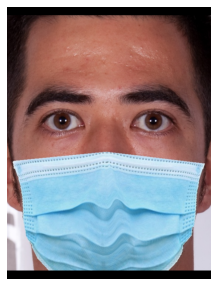

In [13]:
image = crop_face_and_pad('./datasets/original/correct_mask/00012_Mask.jpg')
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(image)
plt.show()

In [3]:
train_dir='./datasets_ref/cmfd/05000/'
train_processed_dir='./datasets_ref/cmfd/56/'

# process cropping for all train faces
logging.info('Processing train_dir[{}]'.format(train_dir))


# if os.path.exists(train_processed_dir): # check and remove if exists folder
#     shutil.rmtree(train_processed_dir) # IMPORTANCE!!!
# os.mkdir(train_processed_dir)

for image_path in tqdm(os.listdir(train_dir)):
    try:
        image = crop_face_and_pad(os.path.join(train_dir, image_path))
        image.save(os.path.join(train_processed_dir, '{}.jpg'.format(image_path[:image_path.index('.')])))
    except:
        continue

2021-06-11 17:39:23,259 INFO: Processing train_dir[./datasets_ref/cmfd/05000/]
100%|████████████████████████████████████████████████████████████████████████████████| 974/974 [28:06<00:00,  1.73s/it]


In [11]:
train_dir='./datasets/original/incorrect_mask/'
train_processed_dir='./datasets/processed/incorrect_mask/'

# process cropping for all train faces
logging.info('Processing train_dir[{}]'.format(train_dir))

# if os.path.exists(train_processed_dir):
#     shutil.rmtree(train_processed_dir)
# os.mkdir(train_processed_dir)

for image_path in tqdm(os.listdir(train_dir)):
    try:
        image = crop_face_and_pad(os.path.join(train_dir, image_path))
        image.save(os.path.join(train_processed_dir, '{}.jpg'.format(image_path[:image_path.index('.')])))
    except:
        continue

2021-06-09 14:08:12,087 INFO: Processing train_dir[./datasets/original/incorrect_mask/]
100%|████████████████████████████████████████████████████████████████████████████| 4777/4777 [2:01:48<00:00,  1.53s/it]


In [12]:

train_dir='./datasets/original/not_mask/'
train_processed_dir='./datasets/processed/not_mask/'

# process cropping for all train faces
logging.info('Processing train_dir[{}]'.format(train_dir))

# if os.path.exists(train_processed_dir):
#     shutil.rmtree(train_processed_dir)
# os.mkdir(train_processed_dir)

for image_path in tqdm(os.listdir(train_dir)):
    try:
        image = crop_face_and_pad(os.path.join(train_dir, image_path))
        image.save(os.path.join(train_processed_dir, '{}.jpg'.format(image_path[:image_path.index('.')])))
    except:
        continue

2021-06-09 16:10:00,223 INFO: Processing train_dir[./datasets/original/not_mask/]
100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [2:17:56<00:00,  1.66s/it]
